## Assignment

RNA-Seq (RNA sequencing), is a sequencing technique to detect the quantity of RNA in a
biological sample at a given moment. Here we have a dataset of normalized RNA Sequencing
reads for pancreatic cancer tumors . The measurement consists of ~20,000 genes for 185
pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene
expression data and metadata (details for each sample) for samples.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import packages 
import numpy as np 
import pandas as pd


In [88]:
from cmapPy.pandasGEXpress.parse import parse

# read column metadata 
my_col_metadata = parse("PAAD.gct", col_meta_only=True)
my_col_metadata[0:5]
# print(my_col_metadata.shape)

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN


In [4]:
my_col_metadata.shape
## Print all the columns
# print(list(my_col_metadata.columns))
# print("lenght of column metadata: ", len(my_col_metadata.columns))

(183, 124)

In [6]:
from cmapPy.pandasGEXpress.parse import parse

# read row metadata 
my_row_metadata = parse("PAAD.gct", row_meta_only=True)
my_row_metadata[0:10]

rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1
A2ML1
A2M
A4GALT
A4GNT


In [7]:
my_row_metadata.index # all index 

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT',
       'A4GNT', 'AAA1',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'psiTPTE22'],
      dtype='object', name='rid', length=18465)

In [9]:
# my_row_metadata.shape # Check shape of row metadata

In [10]:
from cmapPy.pandasGEXpress.parse import parse

# read all data at once 
my_data = parse("PAAD.gct")
my_data.data_df.shape #yup! print the shape 

(18465, 183)

In [11]:
# print samples
my_data.data_df.columns

Index(['aab1-Primary solid Tumor', 'aab4-Primary solid Tumor',
       'aab6-Primary solid Tumor', 'aab8-Primary solid Tumor',
       'aab9-Primary solid Tumor', 'aaba-Primary solid Tumor',
       'aabe-Primary solid Tumor', 'aabf-Primary solid Tumor',
       'aabh-Primary solid Tumor', 'aabi-Primary solid Tumor',
       ...
       'aauh-Primary solid Tumor', 'aaui-Primary solid Tumor',
       'aaul-Primary solid Tumor', 'a8t3-Primary solid Tumor',
       'a8t5-Primary solid Tumor', 'a89d-Solid Tissue Normal',
       'a89d-Primary solid Tumor', 'a8sy-Primary solid Tumor',
       'a8lh-Primary solid Tumor', 'aapl-Primary solid Tumor'],
      dtype='object', name='cid', length=183)

In [12]:
# Print genes 
my_data.data_df.index

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT',
       'A4GNT', 'AAA1',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'psiTPTE22'],
      dtype='object', name='rid', length=18465)

In [13]:
my_data.data_df.values # print gene expression values

array([[ 7.45,  8.1 ,  7.2 , ...,  7.35,  7.2 ,  9.05],
       [ 6.4 ,  5.8 ,  6.4 , ...,  7.9 ,  6.  ,  6.9 ],
       [ 4.7 ,  5.7 ,  3.  , ...,  1.2 ,  4.9 ,  2.  ],
       ...,
       [10.1 ,  9.8 ,  9.8 , ...,  9.8 ,  9.6 , 10.9 ],
       [ 9.3 ,  8.9 ,  9.2 , ...,  8.6 ,  8.4 ,  9.4 ],
       [ 5.5 ,  4.5 ,  4.7 , ...,  5.9 ,  2.4 ,  5.4 ]], dtype=float32)

## Data cleaning and check the distribution of gene expression across samples

In [14]:
old_gene = my_data.data_df.shape[0]  # Total number of genes
print(old_gene)

18465


In [91]:
np.isfinite(my_data.data_df).all(1) # return true if all gene expression value is of same type or not across all the sample

rid
SLC35E2       True
A1BG          True
A1CF         False
A2BP1        False
A2LD1         True
             ...  
ZYG11B        True
ZYX           True
ZZEF1         True
ZZZ3          True
psiTPTE22    False
Length: 18465, dtype: bool

In [92]:
# remove the gene with no gene expression value for all sample. 
data = my_data.data_df[np.isfinite(my_data.data_df).all(1)]
data


cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,9.90,10.0,10.0,9.7,9.90,10.6,10.1,9.9,9.80,10.70,...,10.10,10.10,9.9,10.10,9.8,9.50,9.5,9.40,9.5,10.40
ZYG11B,9.20,9.3,9.4,9.4,9.30,9.9,9.1,9.5,8.90,8.30,...,9.70,9.20,9.5,9.50,9.4,9.40,9.6,9.20,8.3,9.50
ZYX,12.90,12.4,13.5,12.5,13.00,12.2,12.9,12.6,12.70,12.50,...,12.40,12.60,13.5,12.50,12.7,13.60,13.1,13.20,12.3,12.30


In [20]:
my_row_metadata = pd.DataFrame(index = data.index) # create empty dataframe with only index (i.e. genes)
my_row_metadata.shape  ## correct number of genes 

(14098, 0)

In [21]:
my_col_metadata.shape # check if column metadata is still here

(183, 124)

In [22]:
## Convert dataframe object to gct object 

from cmapPy.pandasGEXpress.GCToo import GCToo
my_new_data = GCToo(data, row_metadata_df = my_row_metadata, col_metadata_df = my_col_metadata)

In [23]:
## Create a new gct file with only valid gene expression 
## This is useful for further analysis Part2 
from cmapPy.pandasGEXpress.write_gct import write
write(my_new_data, "PAAD_C.gct", data_null='NaN', metadata_null='N/A', filler_null='-666', data_float_format='%.4f')

In [24]:
data.shape

(14098, 183)

In [25]:
# Convert data in a numpy array
data_m = data.to_numpy()
data_m.shape

print("mean gene expression value: ", data_m.mean())

mean gene expression value:  8.773021


In [26]:
print(data_m.shape[0])
print(data_m.dtype)

14098
float32


In [28]:
new_gene = data_m.shape[0] # new genes with no NaN 
print(new_gene)

14098


#### How many genes had NaNs?

In [29]:
# Total no of genes which have "NaN" values
faulted_gene = old_gene - new_gene
print("No. of genes with NaNs: " + str(faulted_gene))

No. of genes with NaNs: 4367


In [30]:

print(data_m[:, 0].T.shape)

sample = data_m[:, 0].T    ## convert into a vector

## Find statistic 
print("mean: ",  np.mean(sample))
print("medain: ", np.median(sample))
print("variance: ", np.var(sample))
print("standard deviation: ", np.std(sample))
print("max: ", np.max(sample))
print("min: ", np.min(sample))

print(sample)


(14098,)
mean:  8.800536
medain:  9.0
variance:  5.0358295
standard deviation:  2.2440655
max:  17.3
min:  -1.0
[ 7.45  6.4   7.5  ... 12.9  10.1   9.3 ]


### Generate gene expression distribution for all samples. How is the distribution of gene expression across samples?

sample no.:  1
mean:  8.800536
medain:  9.0
variance:  5.0358295
standard deviation:  2.2440655
max:  17.3
min:  -1.0


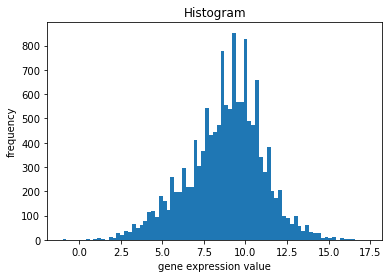

sample no.:  2
mean:  8.844042
medain:  9.0
variance:  4.71118
standard deviation:  2.1705253
max:  17.1
min:  1.1


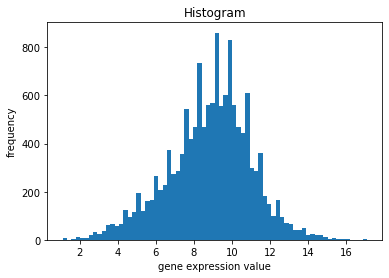

sample no.:  3
mean:  8.667783
medain:  8.9
variance:  5.978267
standard deviation:  2.4450495
max:  18.0
min:  -0.8


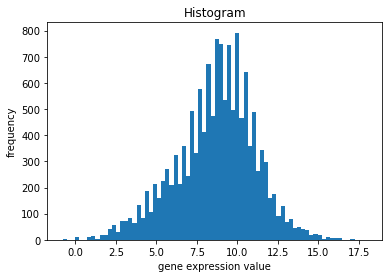

sample no.:  4
mean:  8.782834
medain:  9.0
variance:  4.960911
standard deviation:  2.2273102
max:  18.4
min:  -0.1


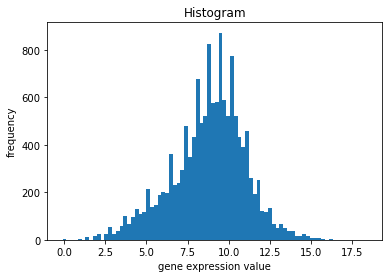

sample no.:  5
mean:  8.816559
medain:  9.0
variance:  4.8184547
standard deviation:  2.195098
max:  17.4
min:  0.1


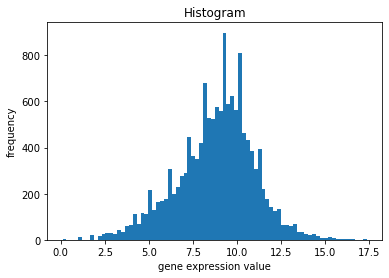

sample no.:  6
mean:  8.818677
medain:  9.1
variance:  4.7720866
standard deviation:  2.1845107
max:  17.7
min:  -0.7


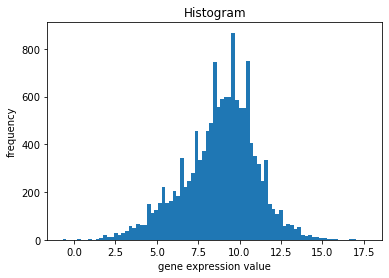

sample no.:  7
mean:  8.786672
medain:  9.0
variance:  5.013405
standard deviation:  2.2390635
max:  18.4
min:  0.3


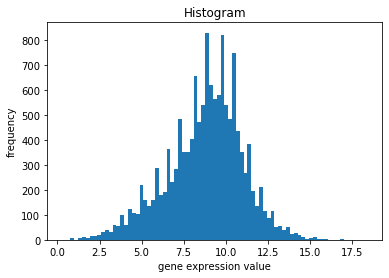

sample no.:  8
mean:  8.951369
medain:  9.1
variance:  4.263602
standard deviation:  2.0648491
max:  17.0
min:  1.1


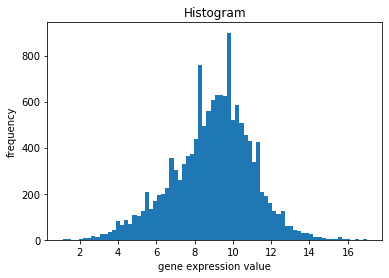

sample no.:  9
mean:  8.78176
medain:  9.0
variance:  5.1527987
standard deviation:  2.2699776
max:  17.3
min:  -1.2


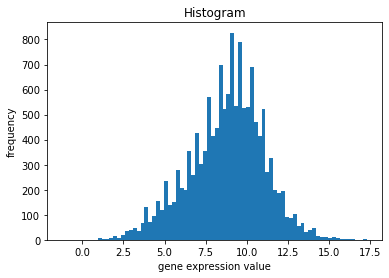

sample no.:  10
mean:  8.690385
medain:  8.9
variance:  5.8772373
standard deviation:  2.4243014
max:  17.6
min:  -1.5


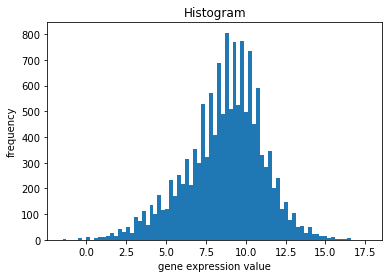

sample no.:  11
mean:  8.896836
medain:  9.1
variance:  4.411048
standard deviation:  2.1002495
max:  17.1
min:  0.8


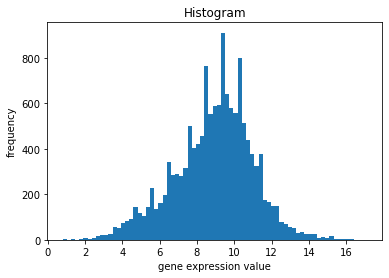

sample no.:  12
mean:  8.8112955
medain:  9.0
variance:  4.9532757
standard deviation:  2.2255955
max:  18.1
min:  -0.3


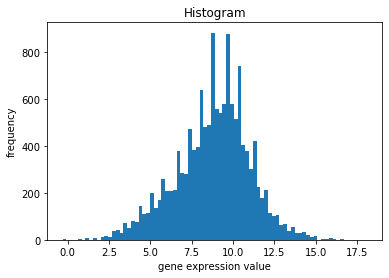

sample no.:  13
mean:  8.621834
medain:  9.0
variance:  6.6071258
standard deviation:  2.570433
max:  18.6
min:  -0.9


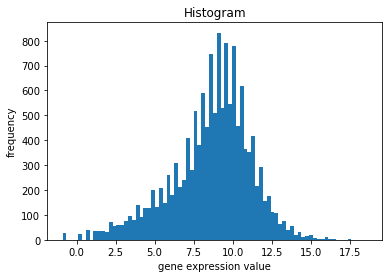

sample no.:  14
mean:  8.8812275
medain:  9.1
variance:  4.5201383
standard deviation:  2.1260617
max:  16.9
min:  -0.7


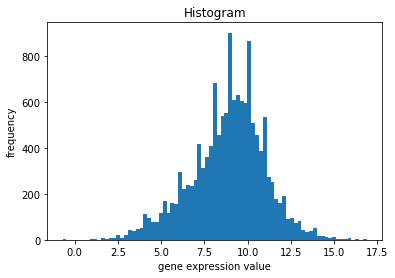

sample no.:  15
mean:  8.837225
medain:  9.0
variance:  4.85251
standard deviation:  2.2028413
max:  18.6
min:  0.3


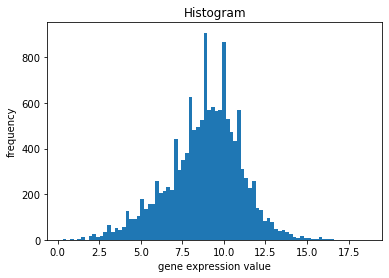

sample no.:  16
mean:  8.661633
medain:  8.9
variance:  5.5918117
standard deviation:  2.3647013
max:  18.0
min:  0.1


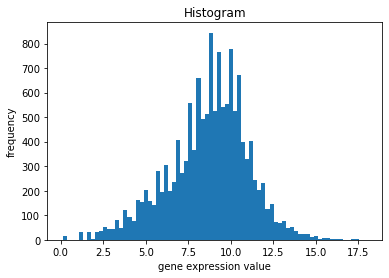

sample no.:  17
mean:  8.621031
medain:  8.85
variance:  6.0159154
standard deviation:  2.4527364
max:  20.4
min:  0.7


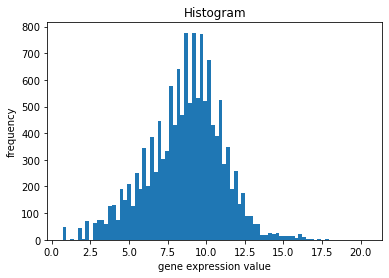

sample no.:  18
mean:  8.691868
medain:  9.0
variance:  5.6835165
standard deviation:  2.3840127
max:  17.3
min:  -1.3


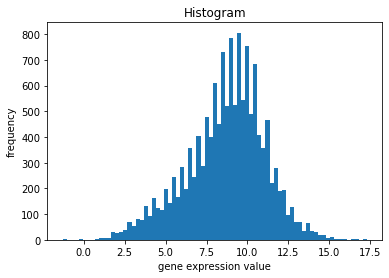

sample no.:  19
mean:  8.723251
medain:  9.0
variance:  5.4964533
standard deviation:  2.3444517
max:  16.9
min:  -0.1


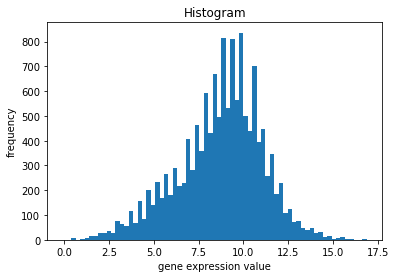

sample no.:  20
mean:  8.816945
medain:  9.0
variance:  4.927302
standard deviation:  2.2197526
max:  16.5
min:  0.0


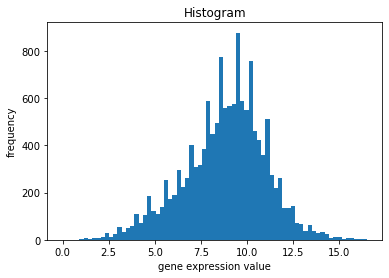

sample no.:  21
mean:  8.691357
medain:  9.0
variance:  5.792042
standard deviation:  2.406666
max:  17.1
min:  0.0


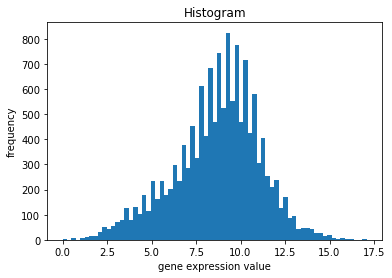

sample no.:  22
mean:  8.759292
medain:  9.0
variance:  5.4675565
standard deviation:  2.3382807
max:  17.3
min:  -0.6


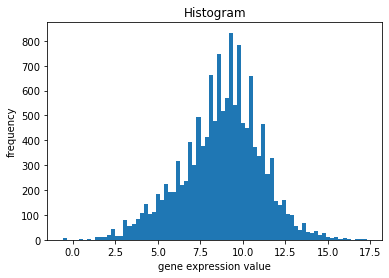

sample no.:  23
mean:  8.61919
medain:  9.0
variance:  6.1760287
standard deviation:  2.4851618
max:  18.4
min:  -0.8


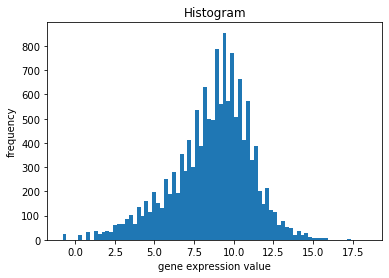

sample no.:  24
mean:  8.781777
medain:  9.0
variance:  5.3327045
standard deviation:  2.309265
max:  19.0
min:  -0.7


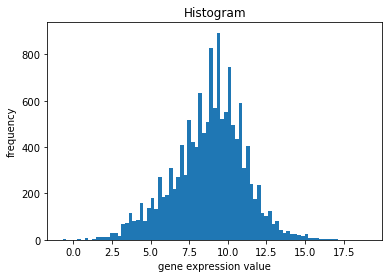

sample no.:  25
mean:  8.881341
medain:  9.1
variance:  4.538089
standard deviation:  2.130279
max:  18.7
min:  0.8


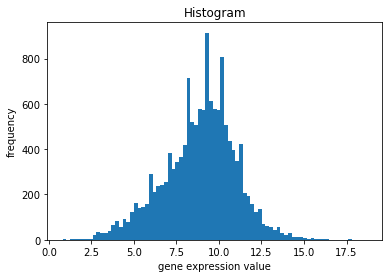

sample no.:  26
mean:  8.885235
medain:  9.1
variance:  4.4502745
standard deviation:  2.1095674
max:  18.2
min:  0.2


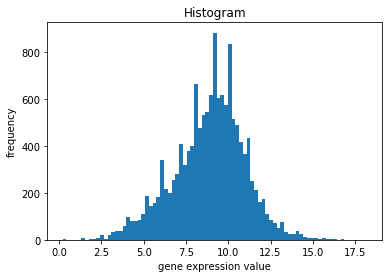

sample no.:  27
mean:  8.80278
medain:  9.0
variance:  5.264939
standard deviation:  2.2945454
max:  18.0
min:  -0.3


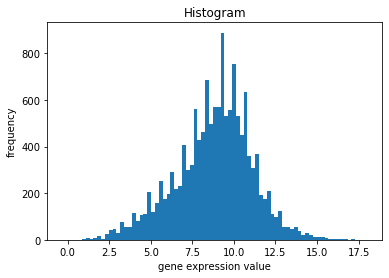

sample no.:  28
mean:  8.812977
medain:  9.0
variance:  5.2654066
standard deviation:  2.2946475
max:  19.5
min:  0.0


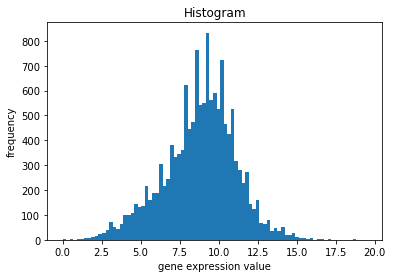

sample no.:  29
mean:  8.808367
medain:  9.0
variance:  5.122225
standard deviation:  2.2632332
max:  17.3
min:  0.6


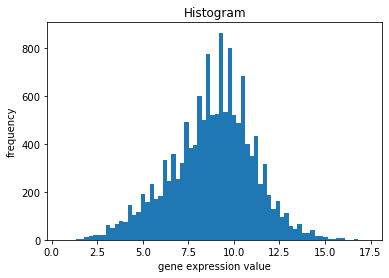

sample no.:  30
mean:  8.479664
medain:  8.9
variance:  6.941694
standard deviation:  2.6347094
max:  18.6
min:  -0.9


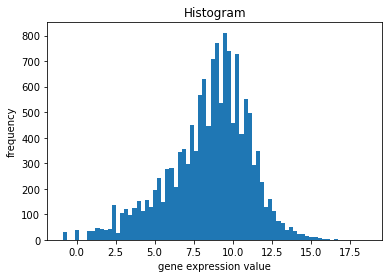

sample no.:  31
mean:  8.793821
medain:  9.1
variance:  4.97812
standard deviation:  2.2311702
max:  19.0
min:  -0.9


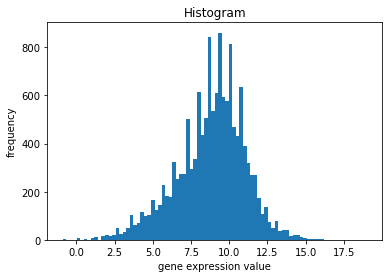

sample no.:  32
mean:  8.913463
medain:  9.1
variance:  4.5673246
standard deviation:  2.13713
max:  19.3
min:  -0.8


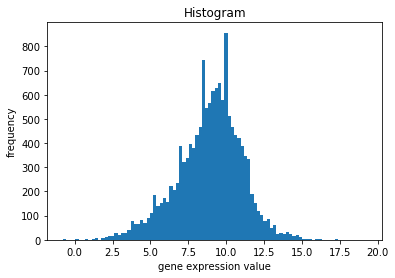

sample no.:  33
mean:  8.577132
medain:  8.9
variance:  6.1922636
standard deviation:  2.488426
max:  18.7
min:  -1.0


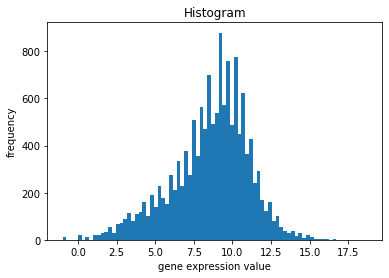

sample no.:  34
mean:  8.366744
medain:  8.9
variance:  7.315955
standard deviation:  2.7048023
max:  16.3
min:  -1.5


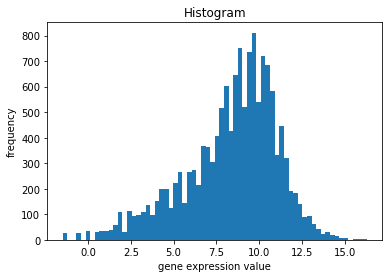

sample no.:  35
mean:  8.296006
medain:  8.8
variance:  7.8677335
standard deviation:  2.804948
max:  19.4
min:  -1.1


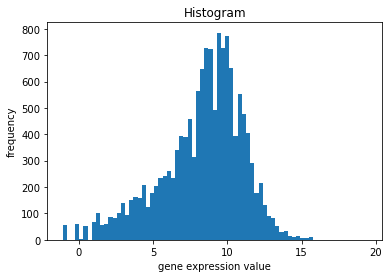

sample no.:  36
mean:  8.743244
medain:  9.0
variance:  5.419256
standard deviation:  2.3279295
max:  17.6
min:  0.4


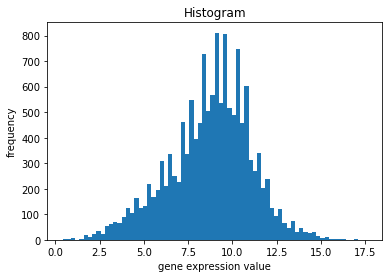

sample no.:  37
mean:  8.608799
medain:  8.9
variance:  5.9466314
standard deviation:  2.4385717
max:  18.3
min:  -0.8


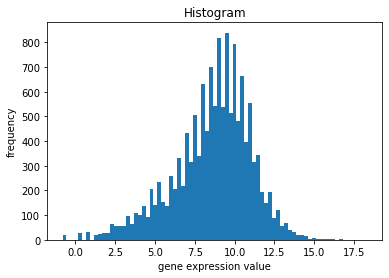

sample no.:  38
mean:  8.956749
medain:  9.2
variance:  4.229686
standard deviation:  2.05662
max:  17.8
min:  0.3


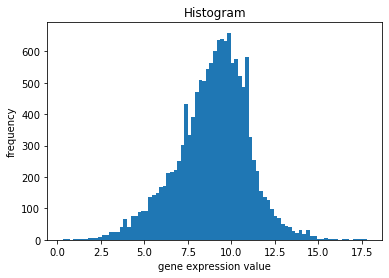

sample no.:  39
mean:  8.662282
medain:  8.9
variance:  5.9458036
standard deviation:  2.438402
max:  18.7
min:  -0.4


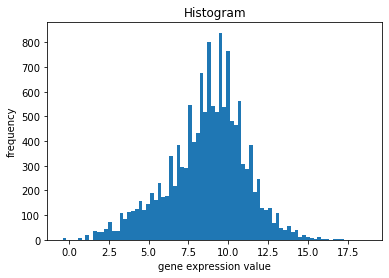

sample no.:  40
mean:  8.734917
medain:  9.0
variance:  5.5751457
standard deviation:  2.3611746
max:  18.1
min:  -0.9


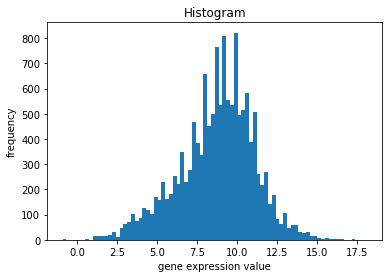

sample no.:  41
mean:  8.945454
medain:  9.1
variance:  4.267464
standard deviation:  2.0657842
max:  16.8
min:  0.5


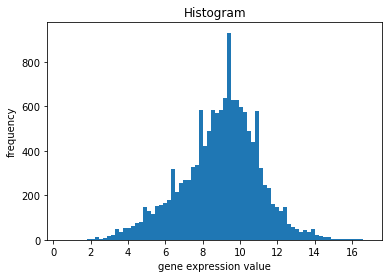

sample no.:  42
mean:  8.801426
medain:  9.0
variance:  5.064626
standard deviation:  2.2504725
max:  17.8
min:  -1.4


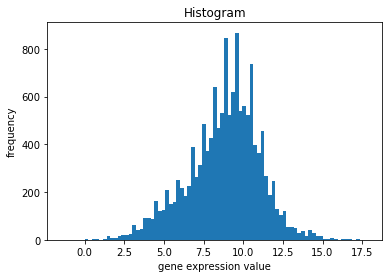

sample no.:  43
mean:  8.668921
medain:  9.0
variance:  5.8726883
standard deviation:  2.423363
max:  17.0
min:  -1.8


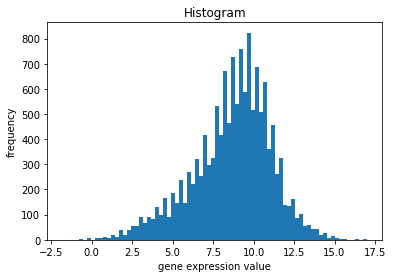

sample no.:  44
mean:  8.622571
medain:  9.0
variance:  5.7611165
standard deviation:  2.4002326
max:  21.4
min:  0.3


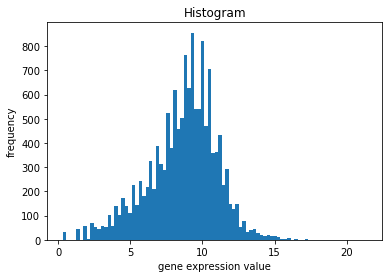

sample no.:  45
mean:  8.832975
medain:  9.1
variance:  4.9994507
standard deviation:  2.2359452
max:  17.4
min:  0.4


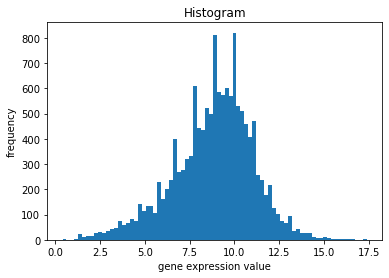

sample no.:  46
mean:  8.856941
medain:  9.1
variance:  4.781365
standard deviation:  2.1866333
max:  17.4
min:  0.0


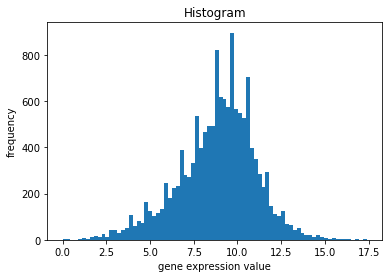

sample no.:  47
mean:  8.682824
medain:  9.0
variance:  5.6196933
standard deviation:  2.3705893
max:  17.5
min:  -0.9


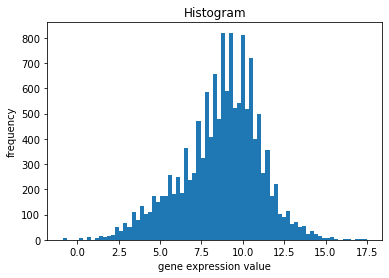

sample no.:  48
mean:  8.762147
medain:  9.0
variance:  4.99428
standard deviation:  2.2347887
max:  18.6
min:  0.2


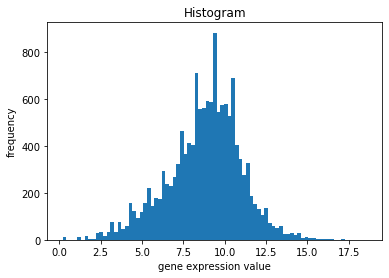

sample no.:  49
mean:  8.771442
medain:  9.0
variance:  5.3622246
standard deviation:  2.3156478
max:  17.2
min:  -1.2


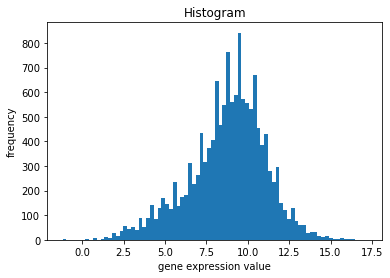

sample no.:  50
mean:  8.695155
medain:  9.0
variance:  5.676808
standard deviation:  2.3826053
max:  17.6
min:  -1.0


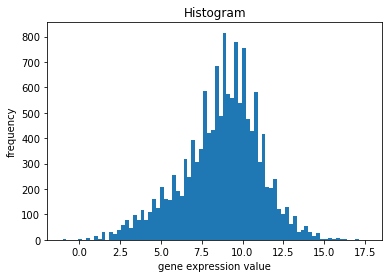

sample no.:  51
mean:  8.897988
medain:  9.1
variance:  4.3225703
standard deviation:  2.0790792
max:  17.8
min:  0.5


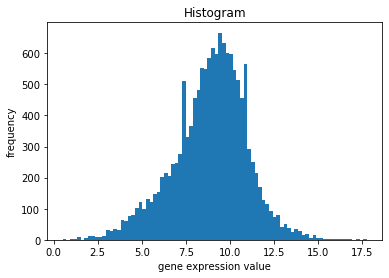

sample no.:  52
mean:  8.848407
medain:  9.1
variance:  4.4435673
standard deviation:  2.1079772
max:  17.4
min:  0.4


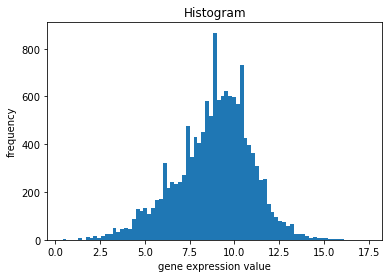

sample no.:  53
mean:  8.680916
medain:  8.9
variance:  5.538414
standard deviation:  2.3533835
max:  17.8
min:  -0.4


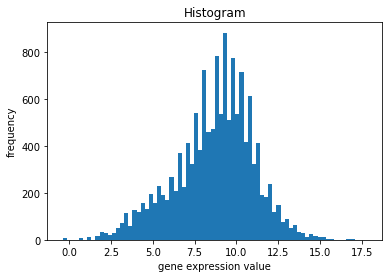

sample no.:  54
mean:  8.751738
medain:  9.0
variance:  5.7651877
standard deviation:  2.4010806
max:  17.6
min:  -0.9


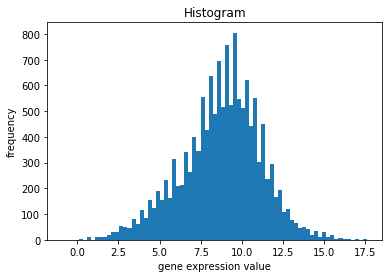

sample no.:  55
mean:  8.797585
medain:  9.0
variance:  4.996849
standard deviation:  2.2353632
max:  16.9
min:  -1.3


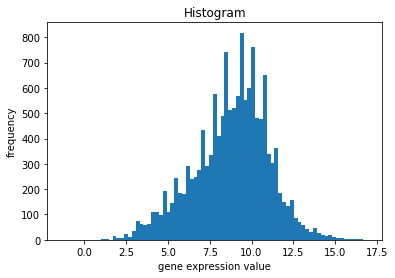

sample no.:  56
mean:  8.846424
medain:  9.1
variance:  4.891403
standard deviation:  2.2116518
max:  17.9
min:  -0.1


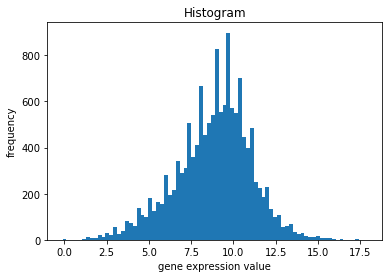

sample no.:  57
mean:  8.188941
medain:  8.8
variance:  8.37608
standard deviation:  2.8941457
max:  18.0
min:  -0.5


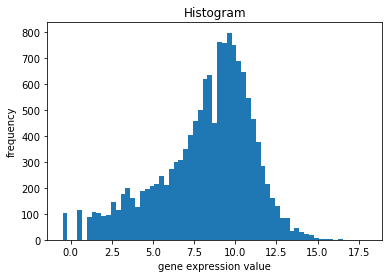

sample no.:  58
mean:  8.598337
medain:  8.9
variance:  6.1367426
standard deviation:  2.4772449
max:  17.7
min:  -0.2


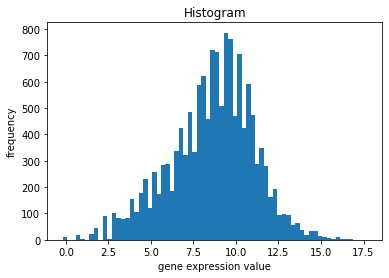

sample no.:  59
mean:  8.908374
medain:  9.1
variance:  4.684653
standard deviation:  2.1644058
max:  19.8
min:  0.5


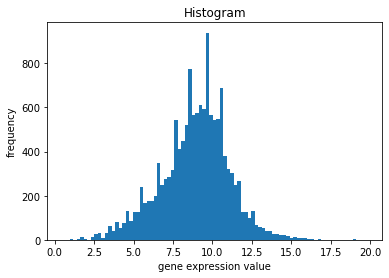

sample no.:  60
mean:  8.56435
medain:  8.9
variance:  6.509132
standard deviation:  2.5513
max:  17.6
min:  -1.4


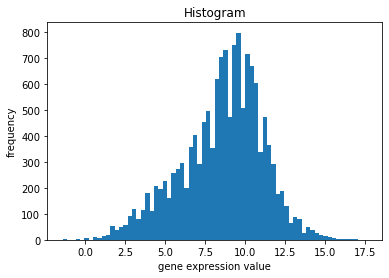

sample no.:  61
mean:  8.889967
medain:  9.1
variance:  4.5815225
standard deviation:  2.140449
max:  17.1
min:  0.1


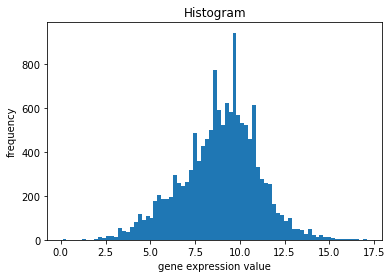

sample no.:  62
mean:  8.781501
medain:  9.0
variance:  5.0239615
standard deviation:  2.2414196
max:  17.1
min:  -0.5


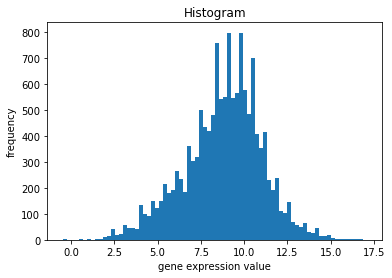

sample no.:  63
mean:  8.57246
medain:  8.9
variance:  6.236125
standard deviation:  2.4972234
max:  17.3
min:  -0.8


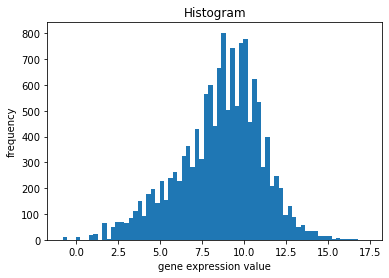

sample no.:  64
mean:  8.77007
medain:  9.0
variance:  5.2073364
standard deviation:  2.2819588
max:  17.6
min:  0.0


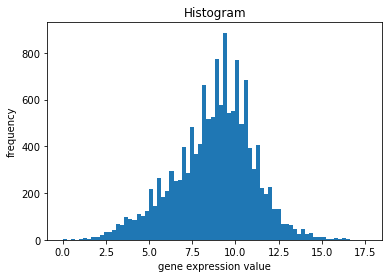

sample no.:  65
mean:  8.745645
medain:  9.0
variance:  5.3995986
standard deviation:  2.3237035
max:  17.5
min:  -1.1


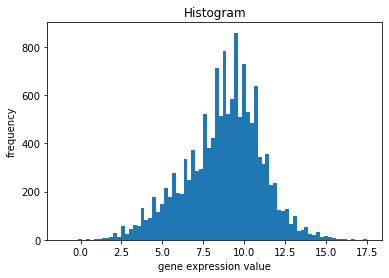

sample no.:  66
mean:  8.738941
medain:  9.0
variance:  5.5814843
standard deviation:  2.3625164
max:  17.6
min:  -0.4


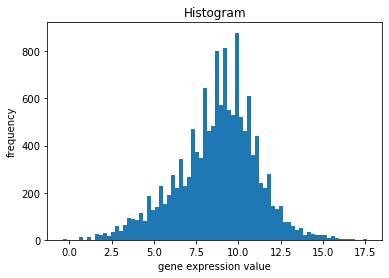

sample no.:  67
mean:  8.639779
medain:  8.9
variance:  5.7158594
standard deviation:  2.3907864
max:  16.8
min:  -0.1


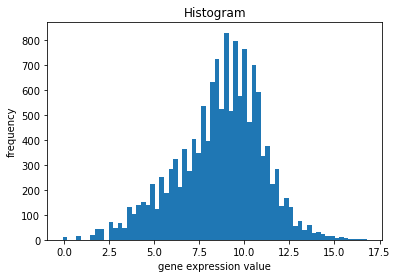

sample no.:  68
mean:  8.857927
medain:  9.1
variance:  4.759451
standard deviation:  2.1816165
max:  17.6
min:  -0.3


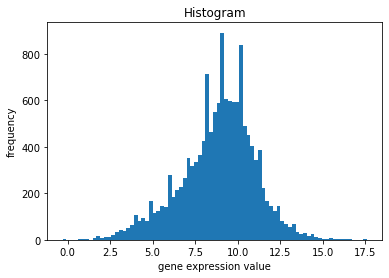

sample no.:  69
mean:  8.801284
medain:  9.0
variance:  5.3287354
standard deviation:  2.3084054
max:  17.8
min:  -1.3


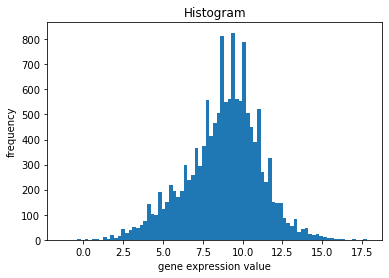

sample no.:  70
mean:  8.731686
medain:  9.1
variance:  5.881128
standard deviation:  2.4251037
max:  17.5
min:  -0.6


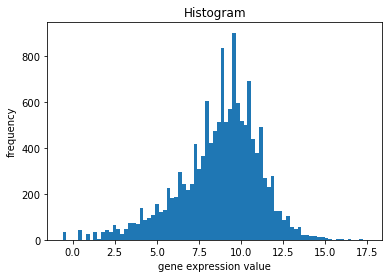

sample no.:  71
mean:  8.899703
medain:  9.1
variance:  4.307381
standard deviation:  2.0754232
max:  17.7
min:  -0.4


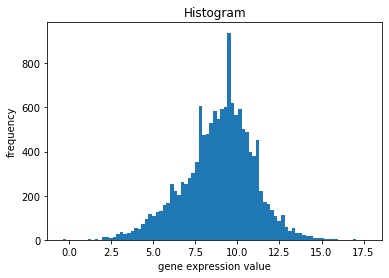

sample no.:  72
mean:  8.847894
medain:  9.1
variance:  4.607908
standard deviation:  2.1466038
max:  16.8
min:  1.1


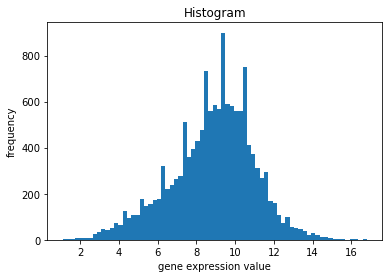

sample no.:  73
mean:  8.796925
medain:  9.1
variance:  4.950829
standard deviation:  2.225046
max:  17.7
min:  0.1


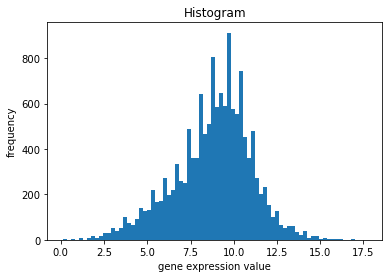

sample no.:  74
mean:  8.612037
medain:  8.9
variance:  5.993164
standard deviation:  2.448094
max:  17.0
min:  -0.4


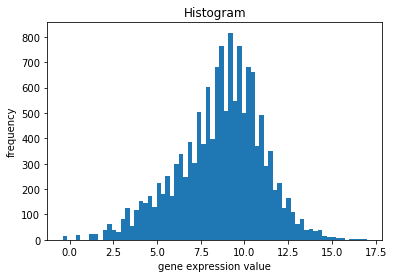

sample no.:  75
mean:  8.808377
medain:  9.0
variance:  4.8677006
standard deviation:  2.2062867
max:  18.1
min:  0.7


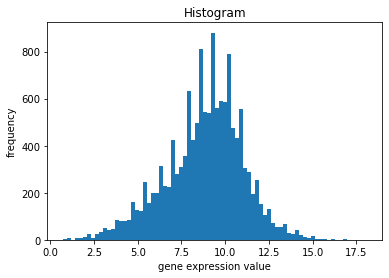

sample no.:  76
mean:  8.860835
medain:  9.1
variance:  4.4986353
standard deviation:  2.1209986
max:  17.6
min:  -0.8


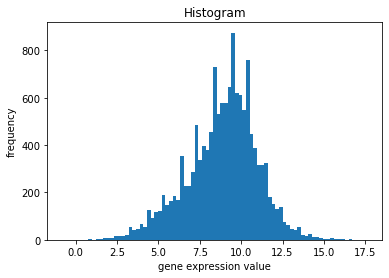

sample no.:  77
mean:  8.669798
medain:  9.0
variance:  5.670406
standard deviation:  2.3812613
max:  17.5
min:  -0.9


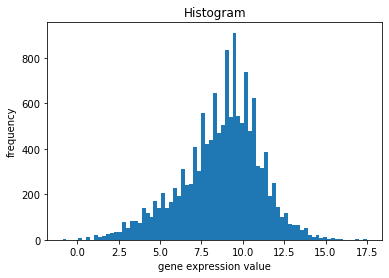

sample no.:  78
mean:  8.655465
medain:  8.9
variance:  6.148627
standard deviation:  2.4796424
max:  17.7
min:  -0.7


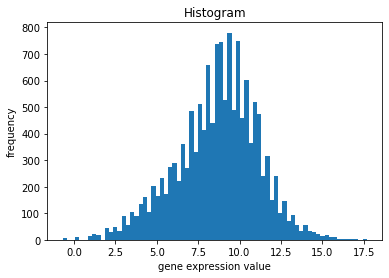

sample no.:  79
mean:  8.230756
medain:  8.6
variance:  8.921863
standard deviation:  2.9869487
max:  18.3
min:  0.0


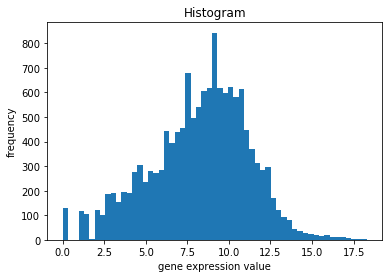

sample no.:  80
mean:  8.897166
medain:  9.1
variance:  4.605794
standard deviation:  2.1461112
max:  19.2
min:  -1.0


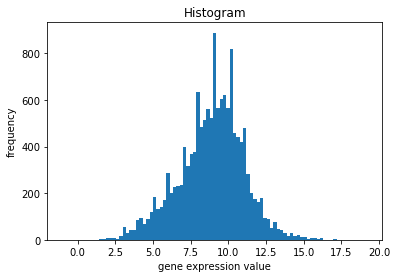

sample no.:  81
mean:  8.692843
medain:  9.0
variance:  5.7119393
standard deviation:  2.3899665
max:  16.8
min:  -1.2


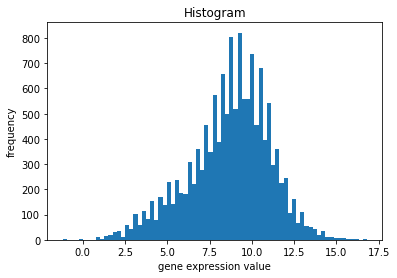

sample no.:  82
mean:  8.228294
medain:  8.7
variance:  9.0513935
standard deviation:  3.0085535
max:  18.9
min:  -0.9


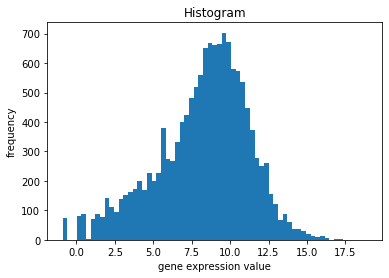

sample no.:  83
mean:  8.758218
medain:  9.0
variance:  5.447926
standard deviation:  2.3340793
max:  18.1
min:  -1.3


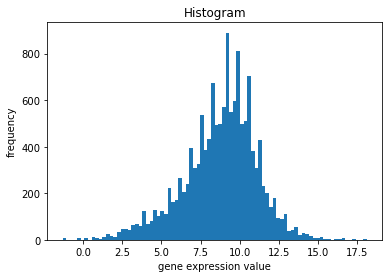

sample no.:  84
mean:  8.764882
medain:  9.0
variance:  5.2448864
standard deviation:  2.2901716
max:  16.9
min:  -0.3


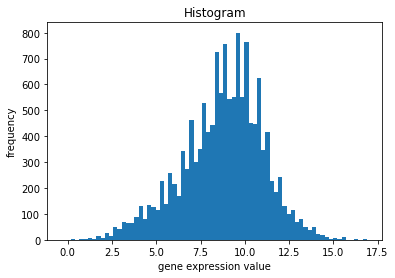

sample no.:  85
mean:  8.862537
medain:  9.1
variance:  4.7331886
standard deviation:  2.1755893
max:  16.6
min:  -0.7


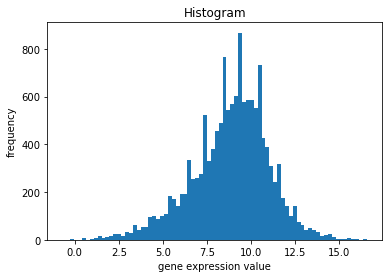

sample no.:  86
mean:  8.749234
medain:  8.9
variance:  5.4453216
standard deviation:  2.3335214
max:  18.3
min:  -0.2


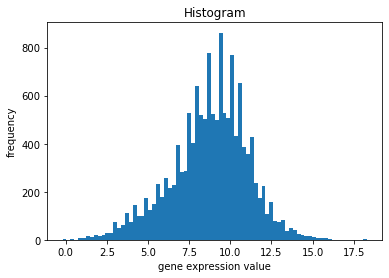

sample no.:  87
mean:  8.983966
medain:  9.1
variance:  4.1135335
standard deviation:  2.028185
max:  18.2
min:  0.9


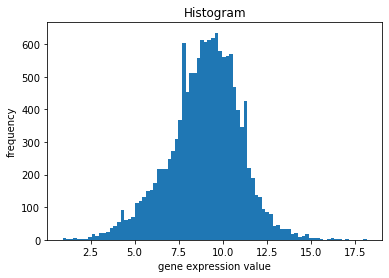

sample no.:  88
mean:  8.784395
medain:  9.1
variance:  5.0750637
standard deviation:  2.2527902
max:  17.7
min:  -1.0


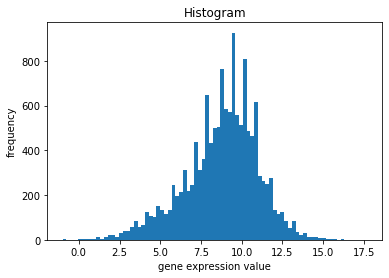

sample no.:  89
mean:  8.791049
medain:  9.0
variance:  5.401702
standard deviation:  2.3241563
max:  19.2
min:  -0.5


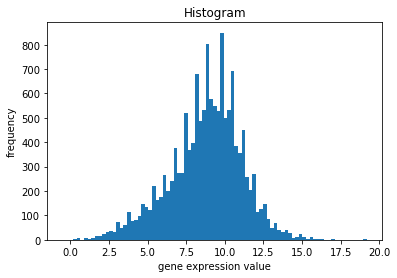

sample no.:  90
mean:  8.769034
medain:  9.0
variance:  5.316668
standard deviation:  2.3057902
max:  16.8
min:  -0.7


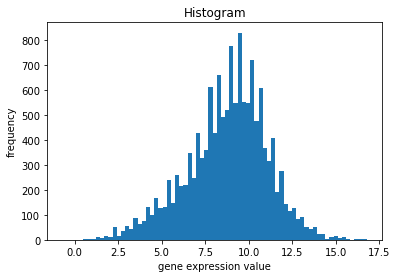

sample no.:  91
mean:  8.924496
medain:  9.1
variance:  4.7761264
standard deviation:  2.185435
max:  18.5
min:  0.3


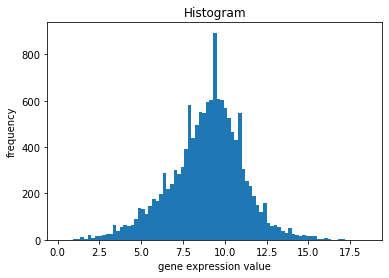

sample no.:  92
mean:  8.889478
medain:  9.1
variance:  4.5861883
standard deviation:  2.1415389
max:  17.5
min:  -1.5


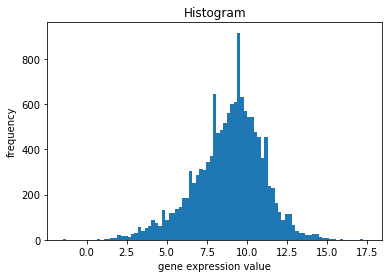

sample no.:  93
mean:  8.88587
medain:  9.1
variance:  4.4483905
standard deviation:  2.1091208
max:  20.0
min:  -0.6


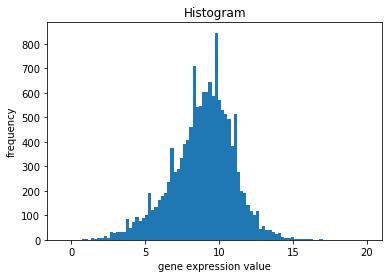

sample no.:  94
mean:  8.631423
medain:  8.9
variance:  6.3929434
standard deviation:  2.5284271
max:  19.4
min:  -1.2


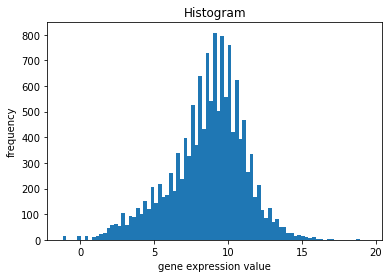

sample no.:  95
mean:  8.882178
medain:  9.1
variance:  4.569327
standard deviation:  2.1375983
max:  17.1
min:  0.2


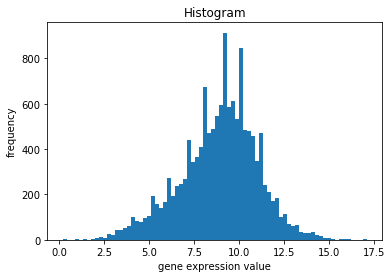

sample no.:  96
mean:  8.859171
medain:  9.1
variance:  4.6980877
standard deviation:  2.1675072
max:  18.5
min:  -1.0


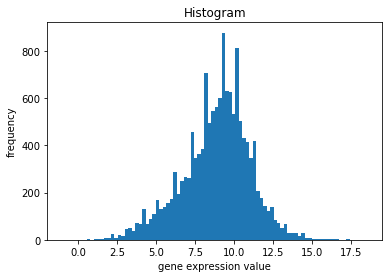

sample no.:  97
mean:  8.964892
medain:  9.2
variance:  4.0866857
standard deviation:  2.0215552
max:  16.6
min:  0.7


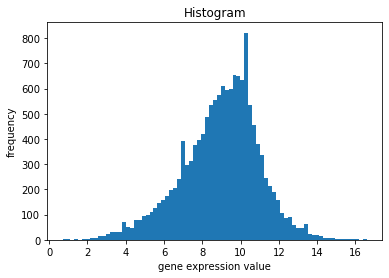

sample no.:  98
mean:  8.923162
medain:  9.1
variance:  4.5258694
standard deviation:  2.127409
max:  17.7
min:  1.0


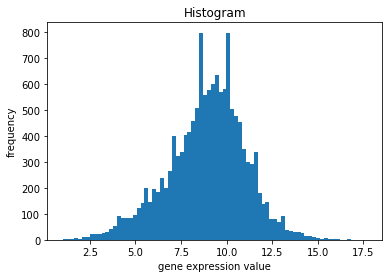

sample no.:  99
mean:  8.944365
medain:  9.2
variance:  4.2093067
standard deviation:  2.0516596
max:  17.1
min:  -0.1


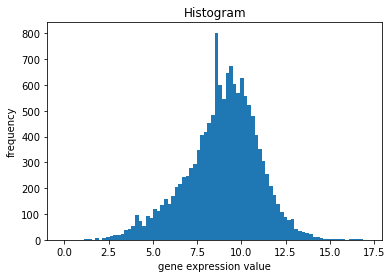

sample no.:  100
mean:  8.836683
medain:  9.1
variance:  4.7741413
standard deviation:  2.1849809
max:  17.4
min:  -0.7


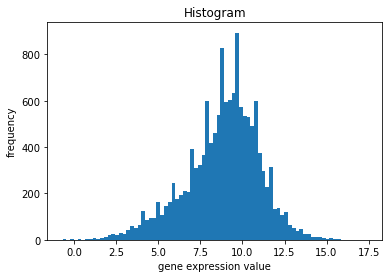

sample no.:  101
mean:  8.87146
medain:  9.1
variance:  4.4413757
standard deviation:  2.1074572
max:  17.1
min:  -0.9


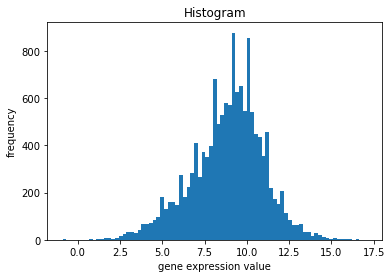

sample no.:  102
mean:  8.872571
medain:  9.1
variance:  4.5907845
standard deviation:  2.1426115
max:  17.8
min:  -0.9


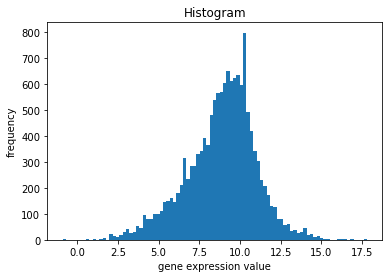

sample no.:  103
mean:  8.810377
medain:  9.0
variance:  4.953941
standard deviation:  2.225745
max:  17.5
min:  -0.9


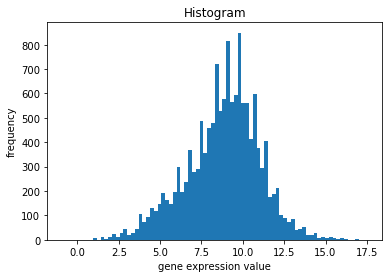

sample no.:  104
mean:  8.84257
medain:  9.0
variance:  4.844469
standard deviation:  2.2010155
max:  17.5
min:  -1.1


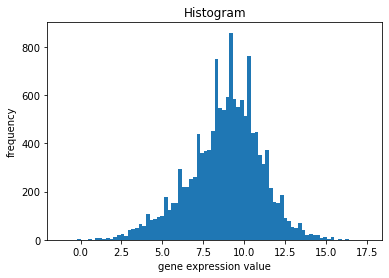

sample no.:  105
mean:  8.854224
medain:  9.1
variance:  4.6388373
standard deviation:  2.153796
max:  16.9
min:  0.9


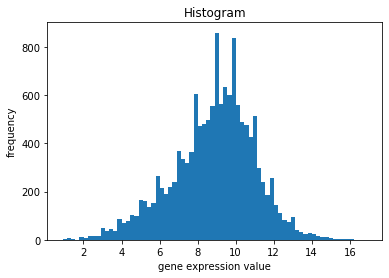

sample no.:  106
mean:  8.761008
medain:  9.0
variance:  5.3554235
standard deviation:  2.3141787
max:  17.8
min:  0.1


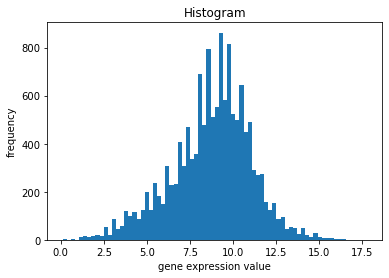

sample no.:  107
mean:  8.934998
medain:  9.1
variance:  4.4249234
standard deviation:  2.1035502
max:  18.4
min:  -0.4


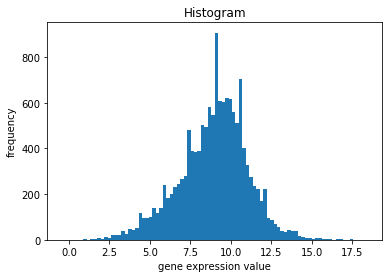

sample no.:  108
mean:  8.802922
medain:  9.0
variance:  5.1444345
standard deviation:  2.2681346
max:  18.6
min:  -0.8


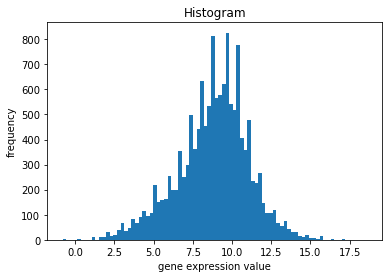

sample no.:  109
mean:  8.809863
medain:  9.0
variance:  4.8199024
standard deviation:  2.1954277
max:  17.1
min:  0.4


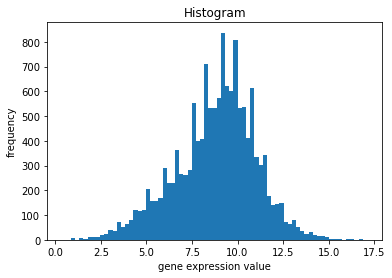

sample no.:  110
mean:  8.601064
medain:  8.9
variance:  5.845917
standard deviation:  2.417833
max:  17.5
min:  -0.7


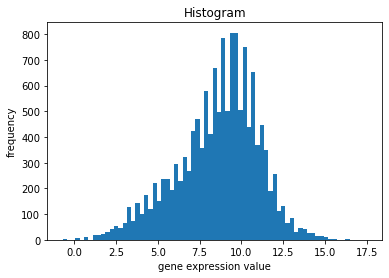

sample no.:  111
mean:  8.740321
medain:  9.0
variance:  5.483773
standard deviation:  2.3417459
max:  17.3
min:  -1.2


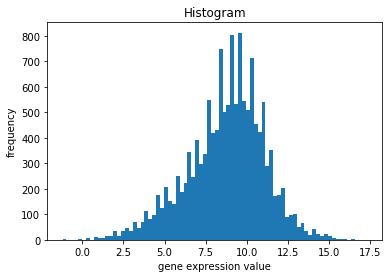

sample no.:  112
mean:  8.740059
medain:  9.0
variance:  5.5526543
standard deviation:  2.3564072
max:  17.4
min:  -0.8


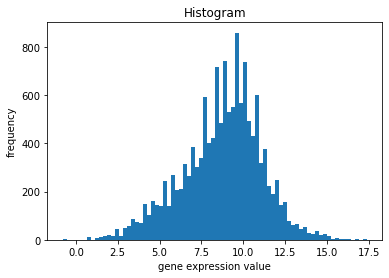

sample no.:  113
mean:  8.676391
medain:  9.0
variance:  5.816151
standard deviation:  2.4116697
max:  17.3
min:  -1.7


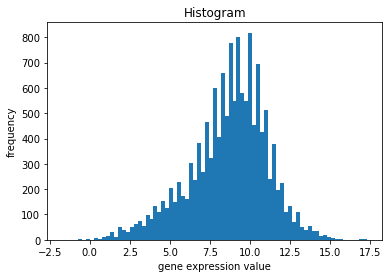

sample no.:  114
mean:  8.789359
medain:  9.0
variance:  5.1695466
standard deviation:  2.2736638
max:  17.5
min:  -1.3


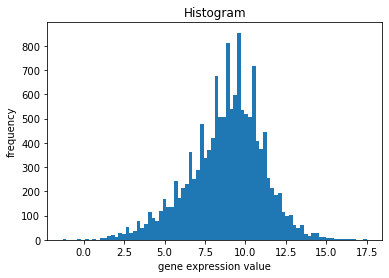

sample no.:  115
mean:  8.6454525
medain:  8.9
variance:  6.357283
standard deviation:  2.5213654
max:  18.8
min:  -1.0


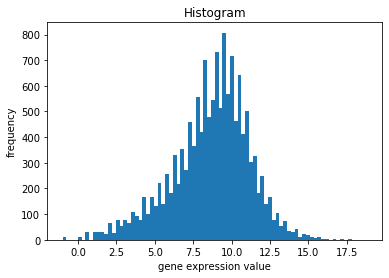

sample no.:  116
mean:  8.803617
medain:  9.0
variance:  5.30072
standard deviation:  2.3023293
max:  17.1
min:  -0.9


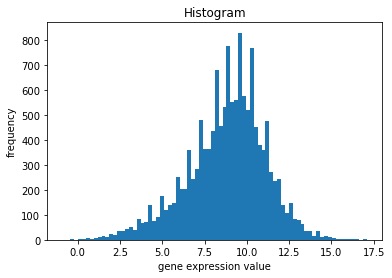

sample no.:  117
mean:  8.756132
medain:  9.0
variance:  5.319191
standard deviation:  2.306337
max:  17.6
min:  -0.6


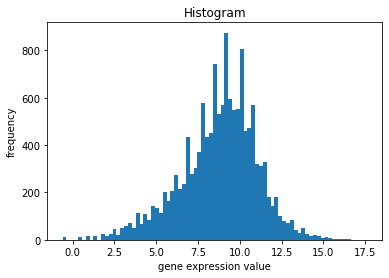

sample no.:  118
mean:  8.80137
medain:  9.1
variance:  5.124856
standard deviation:  2.2638144
max:  18.2
min:  -0.3


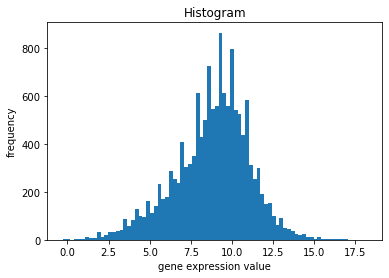

sample no.:  119
mean:  8.805888
medain:  9.0
variance:  5.0451403
standard deviation:  2.246139
max:  17.2
min:  -0.3


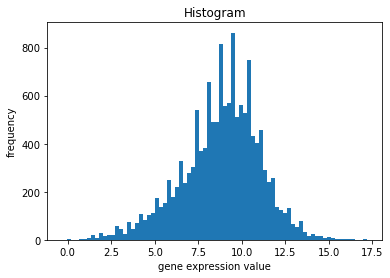

sample no.:  120
mean:  8.725958
medain:  9.0
variance:  5.5700836
standard deviation:  2.3601024
max:  17.9
min:  -0.7


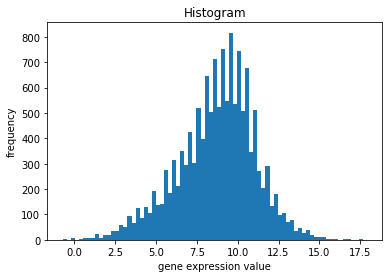

sample no.:  121
mean:  8.814995
medain:  9.0
variance:  5.207799
standard deviation:  2.2820601
max:  18.8
min:  0.0


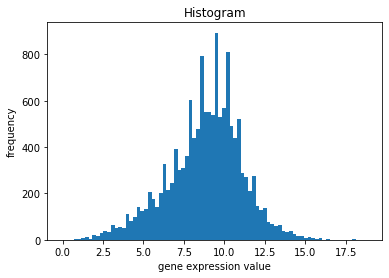

sample no.:  122
mean:  8.742154
medain:  9.0
variance:  5.557826
standard deviation:  2.3575041
max:  17.5
min:  -0.4


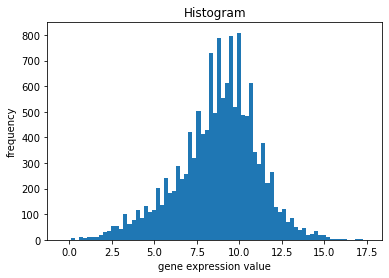

sample no.:  123
mean:  8.7343025
medain:  9.0
variance:  5.5662694
standard deviation:  2.3592942
max:  17.8
min:  -1.5


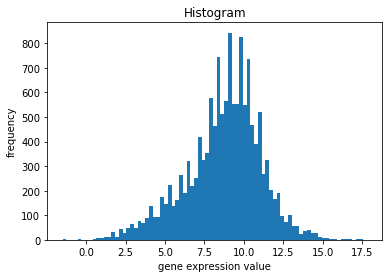

sample no.:  124
mean:  8.804943
medain:  9.0
variance:  5.0961914
standard deviation:  2.2574747
max:  17.5
min:  -0.9


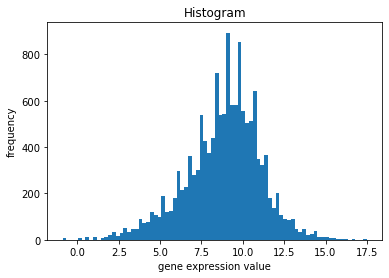

sample no.:  125
mean:  8.783671
medain:  9.0
variance:  5.299702
standard deviation:  2.3021083
max:  17.2
min:  -0.3


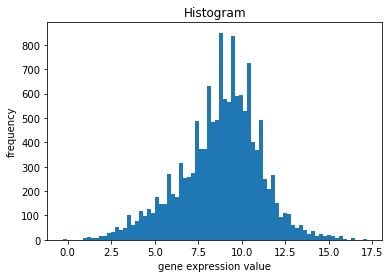

sample no.:  126
mean:  8.722103
medain:  9.0
variance:  5.6149864
standard deviation:  2.3695962
max:  18.8
min:  -1.0


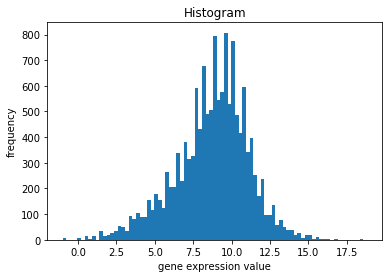

sample no.:  127
mean:  8.80095
medain:  9.0
variance:  5.091219
standard deviation:  2.256373
max:  18.0
min:  -1.2


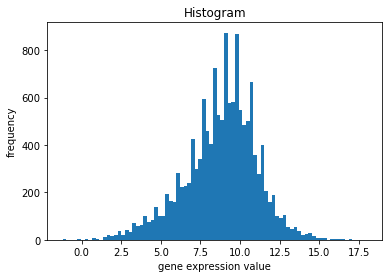

sample no.:  128
mean:  8.651142
medain:  9.0
variance:  6.428782
standard deviation:  2.5355043
max:  19.5
min:  -1.4


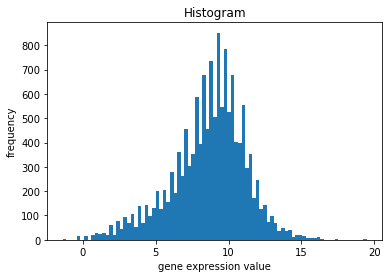

sample no.:  129
mean:  8.9225
medain:  9.1
variance:  4.4184723
standard deviation:  2.1020162
max:  16.7
min:  -1.5


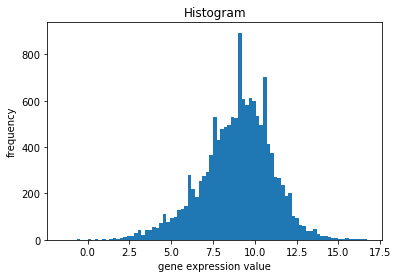

sample no.:  130
mean:  8.877036
medain:  9.1
variance:  4.4071474
standard deviation:  2.0993207
max:  19.6
min:  0.5


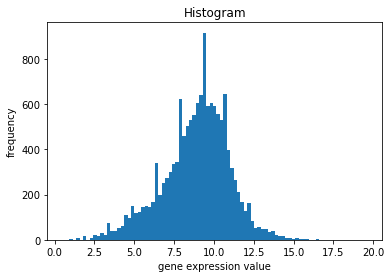

sample no.:  131
mean:  8.851223
medain:  9.1
variance:  4.8343563
standard deviation:  2.1987169
max:  16.6
min:  0.6


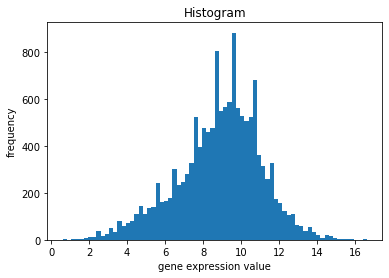

sample no.:  132
mean:  8.921156
medain:  9.1
variance:  4.5874457
standard deviation:  2.1418324
max:  17.9
min:  -1.4


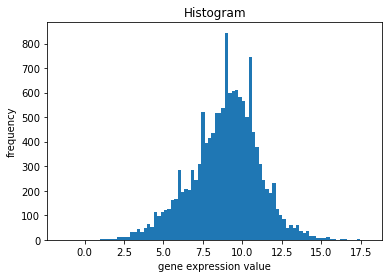

sample no.:  133
mean:  8.652653
medain:  8.9
variance:  5.745475
standard deviation:  2.396972
max:  16.7
min:  -1.0


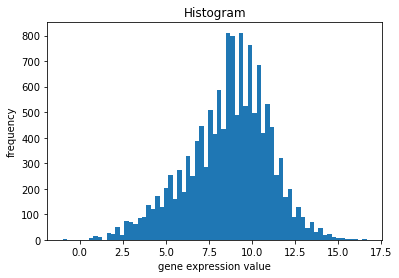

sample no.:  134
mean:  8.900018
medain:  9.1
variance:  4.6577535
standard deviation:  2.1581829
max:  18.2
min:  0.6


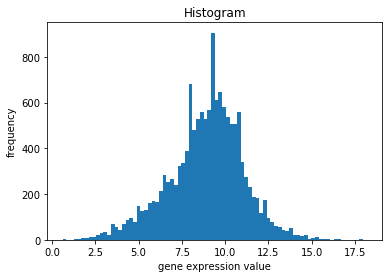

sample no.:  135
mean:  8.7166195
medain:  9.0
variance:  5.803885
standard deviation:  2.4091253
max:  18.9
min:  -1.4


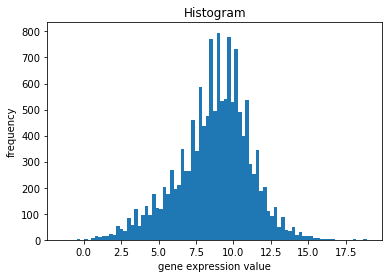

sample no.:  136
mean:  8.88022
medain:  9.1
variance:  4.783949
standard deviation:  2.187224
max:  17.9
min:  -0.2


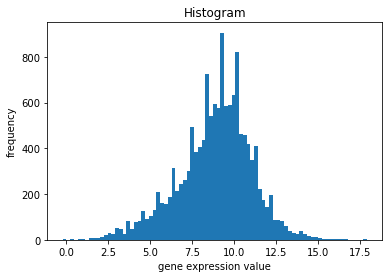

sample no.:  137
mean:  8.742446
medain:  9.0
variance:  5.5290866
standard deviation:  2.351401
max:  17.0
min:  -1.1


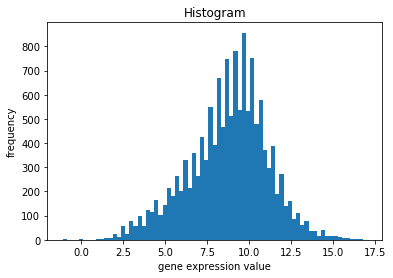

sample no.:  138
mean:  8.79618
medain:  9.0
variance:  4.928533
standard deviation:  2.22003
max:  18.4
min:  1.1


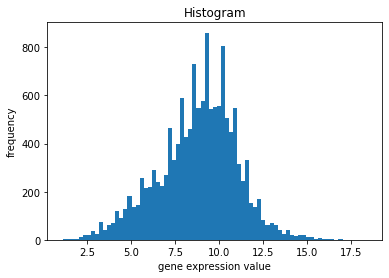

sample no.:  139
mean:  8.717294
medain:  9.0
variance:  5.68576
standard deviation:  2.384483
max:  17.6
min:  -1.1


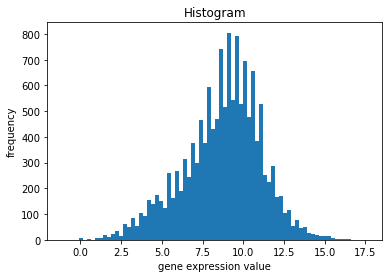

sample no.:  140
mean:  8.753839
medain:  9.0
variance:  5.3765936
standard deviation:  2.3187482
max:  17.1
min:  0.0


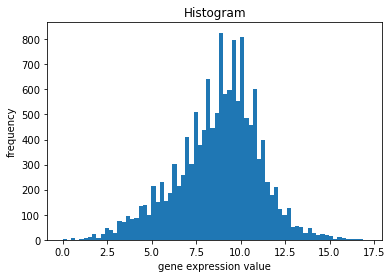

sample no.:  141
mean:  8.901731
medain:  9.1
variance:  4.231484
standard deviation:  2.0570571
max:  19.6
min:  0.5


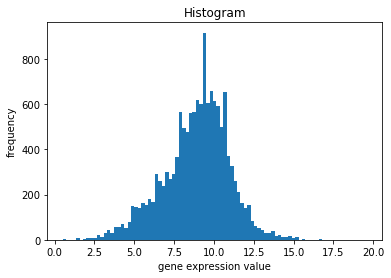

sample no.:  142
mean:  8.810963
medain:  9.0
variance:  4.9018254
standard deviation:  2.2140067
max:  17.3
min:  0.2


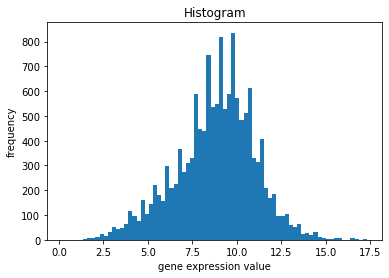

sample no.:  143
mean:  8.766375
medain:  9.0
variance:  5.2970247
standard deviation:  2.3015265
max:  17.0
min:  -1.0


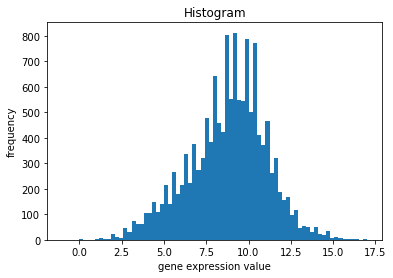

sample no.:  144
mean:  8.94527
medain:  9.1
variance:  4.3923144
standard deviation:  2.095785
max:  18.1
min:  -0.2


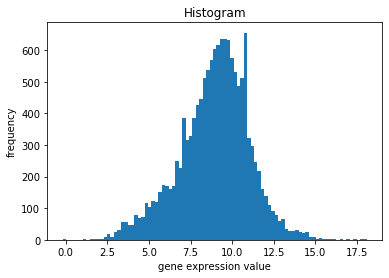

sample no.:  145
mean:  8.913395
medain:  9.1
variance:  4.53959
standard deviation:  2.1306314
max:  17.8
min:  0.4


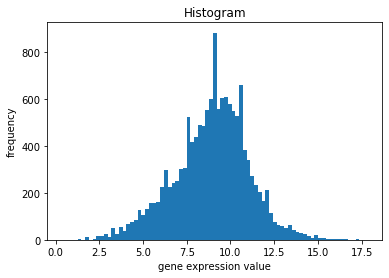

sample no.:  146
mean:  8.919506
medain:  9.1
variance:  4.453003
standard deviation:  2.110214
max:  17.6
min:  -0.1


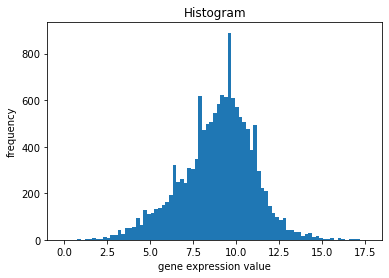

sample no.:  147
mean:  8.878951
medain:  9.1
variance:  4.8992143
standard deviation:  2.2134168
max:  18.8
min:  -1.0


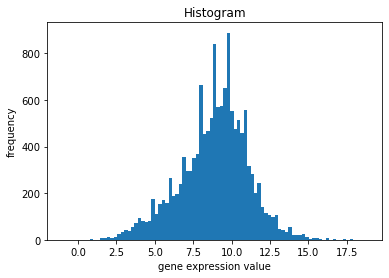

sample no.:  148
mean:  8.873891
medain:  9.1
variance:  4.5323105
standard deviation:  2.1289225
max:  17.4
min:  0.3


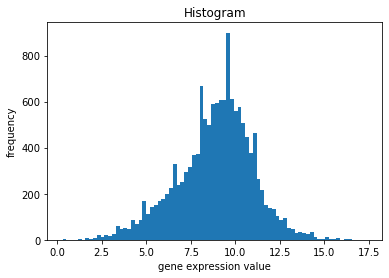

sample no.:  149
mean:  8.785899
medain:  9.0
variance:  5.092194
standard deviation:  2.256589
max:  17.1
min:  -0.2


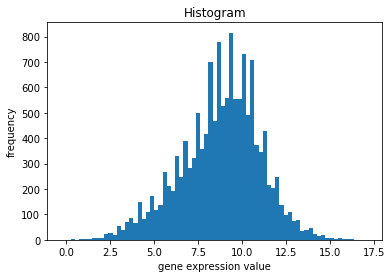

sample no.:  150
mean:  8.928195
medain:  9.1
variance:  4.688932
standard deviation:  2.165394
max:  19.3
min:  -0.3


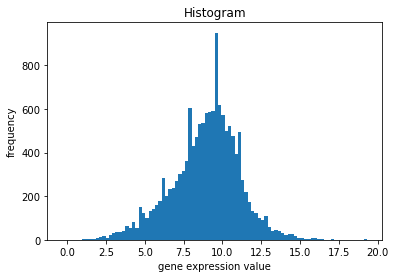

sample no.:  151
mean:  8.941247
medain:  9.1
variance:  4.183676
standard deviation:  2.0454035
max:  16.6
min:  0.8


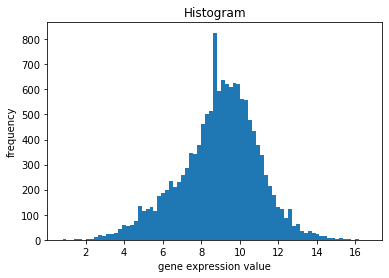

sample no.:  152
mean:  8.629792
medain:  9.0
variance:  6.1741285
standard deviation:  2.4847794
max:  17.2
min:  -1.2


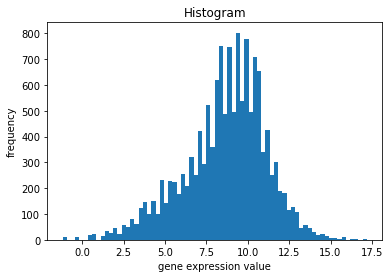

sample no.:  153
mean:  8.7927475
medain:  9.1
variance:  4.964062
standard deviation:  2.2280176
max:  16.7
min:  -1.1


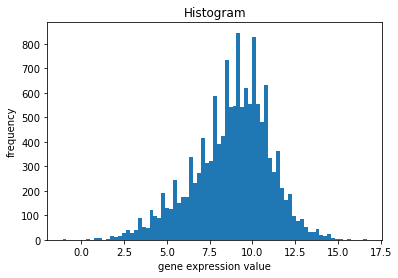

sample no.:  154
mean:  8.667042
medain:  8.9
variance:  5.92496
standard deviation:  2.434124
max:  18.9
min:  -1.0


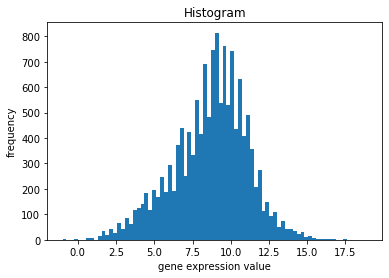

sample no.:  155
mean:  8.827713
medain:  9.0
variance:  4.849023
standard deviation:  2.2020497
max:  20.0
min:  -0.1


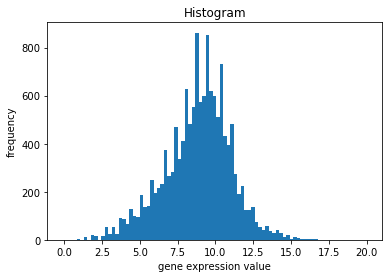

sample no.:  156
mean:  8.662672
medain:  8.9
variance:  5.764756
standard deviation:  2.4009907
max:  18.1
min:  -0.8


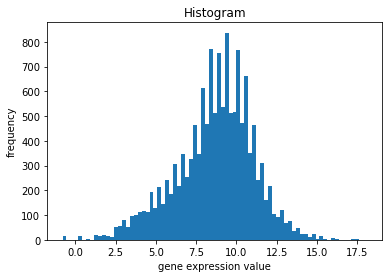

sample no.:  157
mean:  8.690006
medain:  8.9
variance:  5.826943
standard deviation:  2.413906
max:  17.7
min:  -1.0


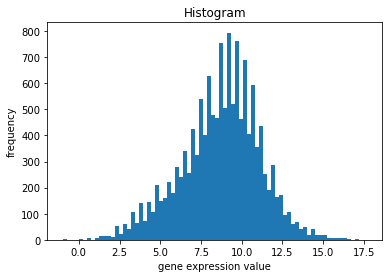

sample no.:  158
mean:  8.755185
medain:  9.0
variance:  5.534318
standard deviation:  2.352513
max:  17.8
min:  -1.3


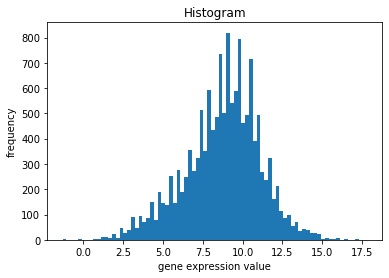

sample no.:  159
mean:  8.844821
medain:  9.1
variance:  5.040504
standard deviation:  2.2451067
max:  18.5
min:  -0.9


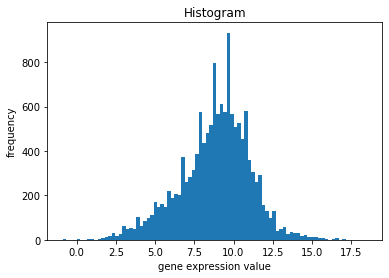

sample no.:  160
mean:  8.71302
medain:  9.0
variance:  5.34257
standard deviation:  2.3114
max:  17.2
min:  -0.5


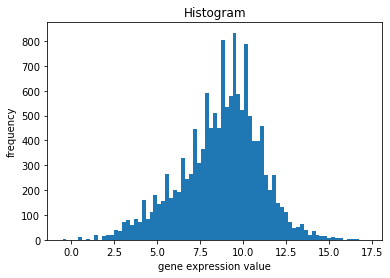

sample no.:  161
mean:  8.87329
medain:  9.1
variance:  4.7392826
standard deviation:  2.1769893
max:  18.6
min:  -0.7


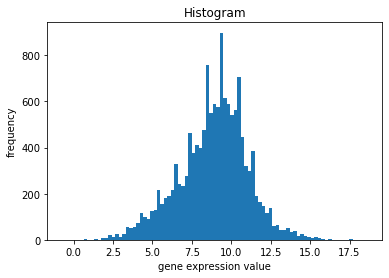

sample no.:  162
mean:  8.895326
medain:  9.1
variance:  4.4620175
standard deviation:  2.1123488
max:  16.9
min:  1.3


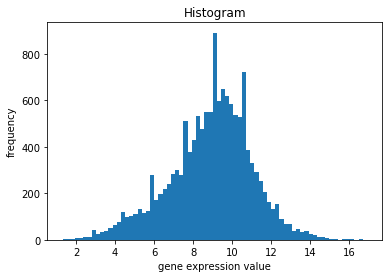

sample no.:  163
mean:  8.906711
medain:  9.1
variance:  4.7363205
standard deviation:  2.1763089
max:  17.6
min:  -0.9


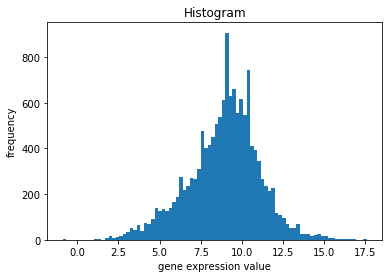

sample no.:  164
mean:  8.691225
medain:  9.0
variance:  5.4577136
standard deviation:  2.336175
max:  16.7
min:  -1.3


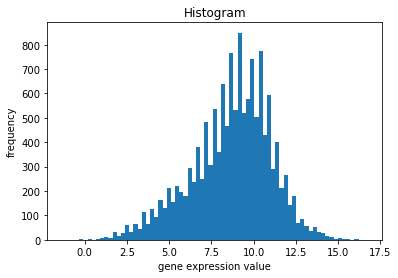

sample no.:  165
mean:  8.750815
medain:  9.0
variance:  5.3275313
standard deviation:  2.3081446
max:  17.2
min:  -1.0


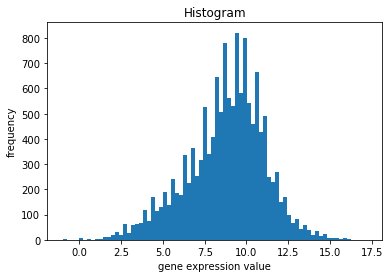

sample no.:  166
mean:  8.911559
medain:  9.1
variance:  4.267623
standard deviation:  2.0658226
max:  17.4
min:  0.1


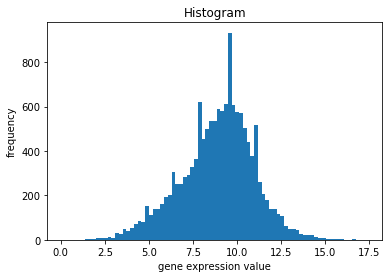

sample no.:  167
mean:  8.8693495
medain:  9.1
variance:  4.601934
standard deviation:  2.145212
max:  18.3
min:  -0.2


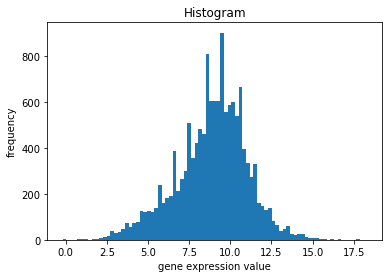

sample no.:  168
mean:  8.466502
medain:  8.9
variance:  7.0137568
standard deviation:  2.6483498
max:  18.2
min:  -1.0


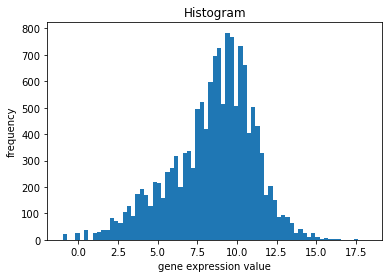

sample no.:  169
mean:  8.666229
medain:  8.9
variance:  5.6590943
standard deviation:  2.378885
max:  17.1
min:  -1.0


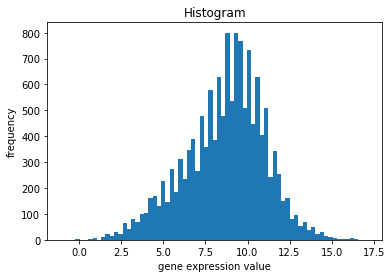

sample no.:  170
mean:  8.742453
medain:  9.0
variance:  5.275805
standard deviation:  2.296912
max:  18.1
min:  -0.2


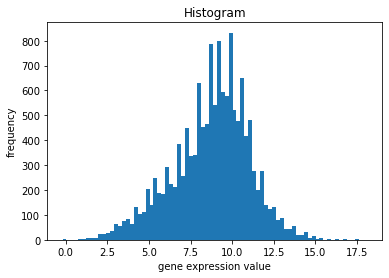

sample no.:  171
mean:  8.641974
medain:  8.9
variance:  5.6293383
standard deviation:  2.3726227
max:  16.5
min:  -1.1


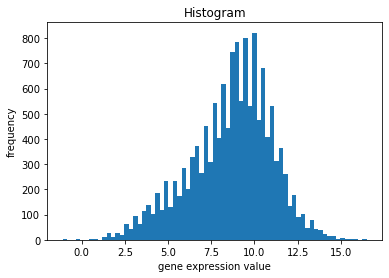

sample no.:  172
mean:  8.909232
medain:  9.1
variance:  4.6327434
standard deviation:  2.152381
max:  18.2
min:  -0.7


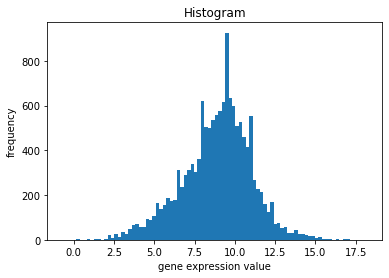

sample no.:  173
mean:  8.91176
medain:  9.1
variance:  4.652495
standard deviation:  2.1569643
max:  18.8
min:  -0.6


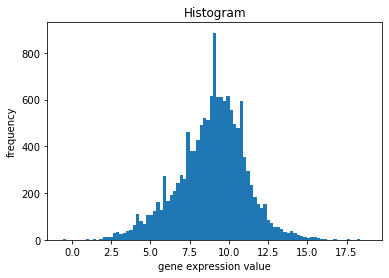

sample no.:  174
mean:  8.899436
medain:  9.1
variance:  4.356683
standard deviation:  2.087267
max:  16.7
min:  -0.9


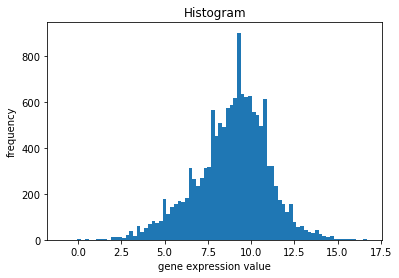

sample no.:  175
mean:  8.894145
medain:  9.1
variance:  4.545667
standard deviation:  2.132057
max:  17.1
min:  -1.0


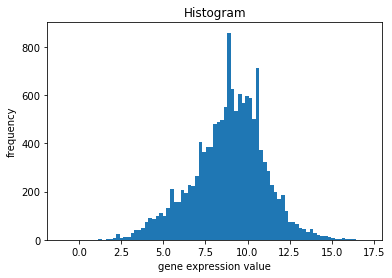

sample no.:  176
mean:  8.796716
medain:  9.0
variance:  5.089864
standard deviation:  2.2560728
max:  18.0
min:  0.7


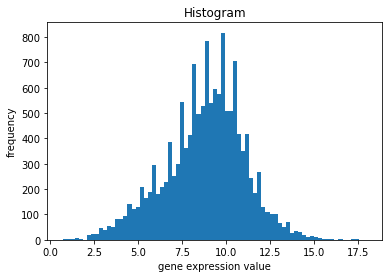

sample no.:  177
mean:  8.901543
medain:  9.1
variance:  4.538077
standard deviation:  2.1302762
max:  18.2
min:  0.1


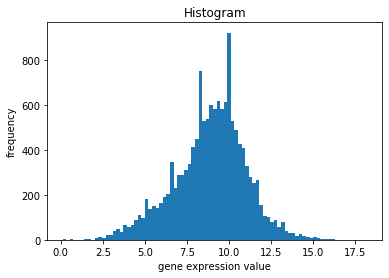

sample no.:  178
mean:  8.913817
medain:  9.1
variance:  4.452198
standard deviation:  2.1100233
max:  17.7
min:  0.3


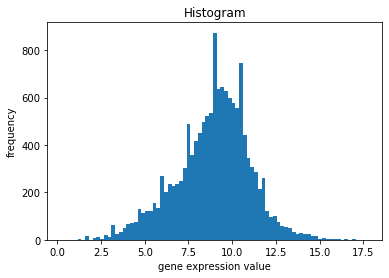

sample no.:  179
mean:  8.832944
medain:  9.0
variance:  5.1383286
standard deviation:  2.2667882
max:  18.6
min:  0.6


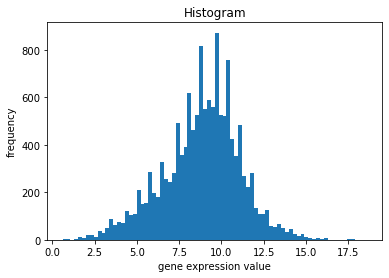

sample no.:  180
mean:  8.833657
medain:  9.0
variance:  4.911784
standard deviation:  2.2162545
max:  18.3
min:  -1.0


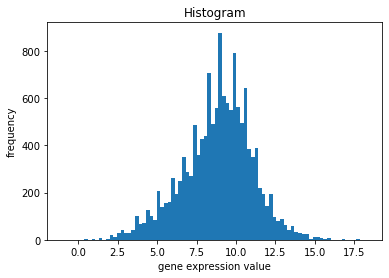

sample no.:  181
mean:  8.720447
medain:  9.0
variance:  5.7150807
standard deviation:  2.3906236
max:  20.0
min:  -0.8


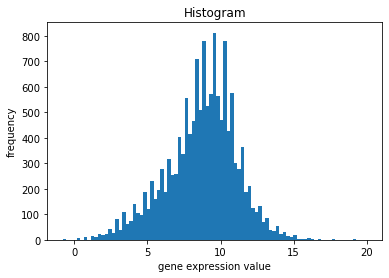

sample no.:  182
mean:  8.643112
medain:  8.9
variance:  5.948429
standard deviation:  2.43894
max:  17.1
min:  -1.2


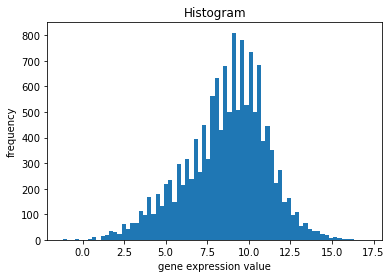

sample no.:  183
mean:  8.77456
medain:  9.1
variance:  5.176462
standard deviation:  2.275184
max:  17.3
min:  -0.8


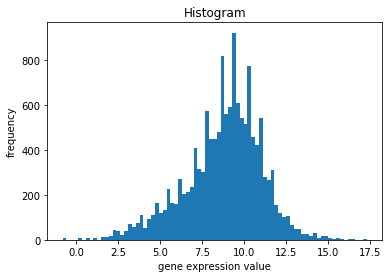

In [31]:

## Plot histogram for all the smaple 
import matplotlib.pyplot as plt 

for i in range(0,data_m.shape[1]):
    sample = data_m[:, i].T
    print("sample no.: ", i+1)
    print("mean: ",  np.mean(sample))
    print("medain: ", np.median(sample))
    print("variance: ", np.var(sample))
    print("standard deviation: ", np.std(sample))
    print("max: ", np.max(sample))
    print("min: ", np.min(sample))
    _ = plt.hist(sample, bins='auto')
    plt.xlabel("gene expression value")
    plt.ylabel("frequency")
    plt.title("Histogram")
    plt.show()


Here we have plotted the histogram of the gene expression value for all samples. By looking at the data we conclude that mean gene expression is more or less the same for all the samples. However, we cannot tell just by looking at the histogram that sample distribution follows Normal Distribution. To do that we do *Kolmogorov–Smirnov test* or *Q-Q plot test*. The number of genes with low expression value than mean is higher as compare to the number of genes with high expression value than mean gene expression value. The distribution is slightly negatively skewed. 

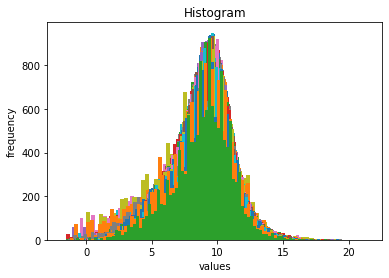

In [32]:
## This will stack all histogram on each other 

import matplotlib.pyplot as plt 

for i in range(0, data_m.shape[1]):
    sample = data_m[:, i].T
    _ = plt.hist(sample, bins='auto')
    plt.xlabel("values")
    plt.ylabel("frequency")
    plt.title("Histogram")

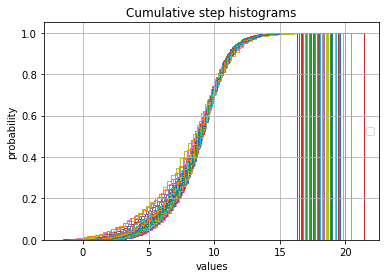

In [102]:

## This will plot emperical cdf of all samples
import logging
logging.getLogger().setLevel(logging.CRITICAL)  ## disable legend warning

for i in range(0, data.shape[1]):
    sample = data_m[:, i].T
    mu = np.mean(sample)
    sigma = np.std(sample)
    n_bins = 'auto'
    
    # plot the cumulative histogram
    n, bins, patches = plt.hist(sample, n_bins, density=True, histtype='step', cumulative=True)
    plt.grid(True)
    plt.legend(loc='right')
    plt.title('Cumulative step histograms')
    plt.xlabel('values')
    plt.ylabel('probability')

    

By looking at above CDF histogram, we can say that variation among genes with low expression is slightly higher as compare to genes with higher expression value. 

### Part 3 Q 1

However, we have to remove the Neuroendocrine tumors sample.
To remove the sample based on column meta data, we will use Phantasus tool. 
Since all Neuroendocrine tumors samples is sepearted in the PCA plot. Out of 183 sample, 175 samples are Pancreatic Adenocarcinoma. We have included 2 samples which has (moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%).

In [78]:
from cmapPy.pandasGEXpress.parse import parse

# read all data at once 
adeno_data = parse("PAAD_AD.gct") ## cleaned and Pancreatic Adenocarcinoma file
adeno_data.data_df.shape #yup! print the shape 
adeno_data.data_df.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2M,14.30,14.0,13.1,13.8,14.60,13.3,13.4,14.2,13.90,11.90,...,14.50,14.30,14.5,14.20,14.3,14.90,14.5,13.00,12.1,13.30
A4GALT,10.60,10.2,10.1,8.6,10.10,9.3,9.5,8.4,8.40,7.90,...,9.10,9.50,10.0,9.50,9.1,10.50,9.8,10.80,8.3,9.00


In [79]:
## Sepearte Type 1 IFN gene 
with open("type1_IFN.txt") as file:
    IFNs = file.read().splitlines()
    
print(IFNs)  
# Find all IFN gene
ifn_data = adeno_data.data_df.loc[IFNs]

ifn_data   ## Print IFNs data 

['IFIT1', 'IFI44', 'IFIT3', 'MX2', 'OAS1', 'OAS3', 'BST2', 'IFITM1', 'MX1', 'STAT1', 'IFI27', 'CXCL10', 'IFI16', 'IFI30', 'IFIH1', 'IFIT2', 'IFITM2', 'IRF1', 'IRF9', 'ISG15', 'OAS2', 'PSME1', 'SOCS1', 'STAT2']


cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
IFIT1,9.5,10.5,12.2,10.7,8.6,6.7,9.0,11.4,8.5,7.2,...,8.3,7.6,9.6,8.7,9.4,8.4,9.5,10.4,11.1,10.2
IFI44,9.4,11.1,11.2,10.6,8.8,8.4,9.0,11.1,8.6,7.9,...,8.3,8.3,9.8,10.0,9.3,8.9,9.3,10.6,10.8,10.9
IFIT3,10.0,10.8,11.6,10.3,9.0,7.8,9.4,11.5,9.1,9.1,...,7.9,8.3,9.8,9.8,9.6,9.1,9.6,10.5,10.7,10.2
MX2,9.8,10.7,11.0,10.8,8.3,9.2,9.9,11.1,9.2,9.2,...,9.3,9.2,10.0,9.2,9.7,9.3,10.0,11.4,11.5,10.9
OAS1,11.7,11.0,11.3,10.5,9.2,10.6,10.5,11.4,8.9,7.5,...,8.3,9.5,10.8,8.9,9.5,10.5,10.9,11.1,11.9,10.7
OAS3,11.3,11.9,12.0,11.0,9.7,9.6,10.2,12.3,10.1,9.5,...,9.5,10.0,10.8,10.3,10.0,10.1,10.4,11.1,12.4,11.5
BST2,12.2,12.7,12.7,11.9,10.4,10.9,11.7,11.7,9.9,10.8,...,11.0,11.0,11.8,11.0,12.0,12.2,12.5,12.9,13.4,11.6
IFITM1,11.2,12.9,12.5,12.0,10.6,10.8,11.5,12.1,9.7,10.6,...,11.5,11.4,11.7,10.8,12.1,11.9,11.9,12.2,12.9,12.5
MX1,11.5,12.4,12.6,12.9,10.3,10.1,11.5,13.0,10.7,10.4,...,10.1,10.1,11.9,10.2,10.8,11.0,11.2,12.6,13.6,12.9


In [80]:
## Transpose the data to plot histogram
ifn_data = ifn_data.transpose()
ifn_data

rid,IFIT1,IFI44,IFIT3,MX2,OAS1,OAS3,BST2,IFITM1,MX1,STAT1,...,IFIH1,IFIT2,IFITM2,IRF1,IRF9,ISG15,OAS2,PSME1,SOCS1,STAT2
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,9.5,9.4,10.0,9.8,11.7,11.3,12.2,11.2,11.5,12.2,...,9.5,8.6,11.2,10.8,11.4,11.7,11.5,12.3,7.7,11.2
aab4-Primary solid Tumor,10.5,11.1,10.8,10.7,11.0,11.9,12.7,12.9,12.4,12.7,...,10.2,8.9,12.3,11.2,11.4,11.7,11.0,12.3,7.4,11.3
aab6-Primary solid Tumor,12.2,11.2,11.6,11.0,11.3,12.0,12.7,12.5,12.6,12.9,...,10.3,10.5,11.3,9.8,11.4,13.9,11.8,12.0,7.9,12.0
aab8-Primary solid Tumor,10.7,10.6,10.3,10.8,10.5,11.0,11.9,12.0,12.9,12.5,...,10.1,9.4,12.3,10.4,10.8,11.8,11.4,11.7,6.8,11.7
aab9-Primary solid Tumor,8.6,8.8,9.0,8.3,9.2,9.7,10.4,10.6,10.3,11.6,...,9.5,8.3,11.9,10.2,10.6,9.7,9.1,11.7,7.4,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a89d-Solid Tissue Normal,8.4,8.9,9.1,9.3,10.5,10.1,12.2,11.9,11.0,11.5,...,9.0,8.2,12.5,10.4,10.4,10.9,10.1,11.9,7.2,11.3
a89d-Primary solid Tumor,9.5,9.3,9.6,10.0,10.9,10.4,12.5,11.9,11.2,11.8,...,9.6,8.9,12.2,10.4,10.3,11.3,10.5,12.0,7.2,11.1
a8sy-Primary solid Tumor,10.4,10.6,10.5,11.4,11.1,11.1,12.9,12.2,12.6,12.2,...,9.5,8.9,11.7,10.7,10.5,12.7,11.3,11.5,7.3,11.8


In [81]:
ifn_data.shape # check dimensions agian

(175, 24)

In [82]:
ifn_data.columns[0]
# ifn_data['IFIT1']

'IFIT1'

IFN: IFIT1
IFN: IFI44
IFN: IFIT3
IFN: MX2
IFN: OAS1
IFN: OAS3
IFN: BST2
IFN: IFITM1
IFN: MX1
IFN: STAT1
IFN: IFI27
IFN: CXCL10
IFN: IFI16
IFN: IFI30
IFN: IFIH1
IFN: IFIT2
IFN: IFITM2
IFN: IRF1
IFN: IRF9
IFN: ISG15
IFN: OAS2
IFN: PSME1
IFN: SOCS1
IFN: STAT2


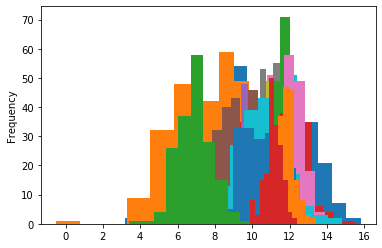

In [95]:

## plot all histogram at once 
## Individual histogram for each gene can be plotted.
import matplotlib.pyplot as plt
for i in range(0, ifn_data.shape[1]):
    print("IFN: " + str(ifn_data.columns[i]))
    ifn_data[ifn_data.columns[i]].plot(kind='hist', bins = 10)
#     plt.show()


In [99]:
ifn_data_m = ifn_data.to_numpy()
# ifn_data_m[1:]

ifn_data_m.shape[0]

175

In [100]:
print("mean gene expression value of all IFNs: ", ifn_data_m.mean())

mean gene expression value of all IFNs:  10.402072


One thing to notice here is that the mean gene expression value of IFNs is higher than the mean gene expression of all genes combined. (Hard to convince!!!) But I will try to. 

Let assume that we have the only sample with all the gene expressed data. After analysis, we will find out the mean gene expression for only one sample. Now, Let's pick only one IFN gene ( for example IFIT3), and compare its values to mean gene expression value (total). By looking at it we would not be able to tell, if it's expression is higher than the mean expression value.  Now, we will compare the gene expression value for IFT3  across all samples, (also take mean). Now, if its mean expression is higher as compared to the sample mean. Then we can conclude that it's the higher expression that the rest of the gene combined. The same analogy can be applied for all the IFNs. 

Here, we conclude that the IFNs gene has higher expression than the mean expression of the all gene. If the patient (or person) is infected from pathogens i.e. cancer cells, viruses, bacteria, and parasites. 

mean gene expression value of all IFNs combined across all samples:  10.402072 

mean gene expression value of all genes across all samples:  8.773021



In [101]:

## print statistic for gene 
for i in range(0, ifn_data_m.shape[0]):
    sample = ifn_data_m[i:]
    
    print("mean: ",  np.mean(sample))
    print("medain: ", np.median(sample))
    print("variance: ", np.var(sample))
    print("standard deviation: ", np.std(sample))
    print("max: ", np.max(sample))
    print("min: ", np.min(sample))
    print('\n')

mean:  10.402072
medain:  10.6
variance:  3.1083407
standard deviation:  1.7630486
max:  15.8
min:  -0.5


mean:  10.399521
medain:  10.6
variance:  3.1151674
standard deviation:  1.7649837
max:  15.8
min:  -0.5


mean:  10.3944845
medain:  10.6
variance:  3.1172311
standard deviation:  1.7655683
max:  15.8
min:  -0.5


mean:  10.387451
medain:  10.6
variance:  3.115201
standard deviation:  1.7649932
max:  15.8
min:  -0.5


mean:  10.383797
medain:  10.6
variance:  3.117586
standard deviation:  1.7656686
max:  15.8
min:  -0.5


mean:  10.386618
medain:  10.6
variance:  3.1221886
standard deviation:  1.7669716
max:  15.8
min:  -0.5


mean:  10.392283
medain:  10.6
variance:  3.1133008
standard deviation:  1.7644548
max:  15.8
min:  -0.5


mean:  10.392435
medain:  10.6
variance:  3.1137598
standard deviation:  1.7645849
max:  15.8
min:  -0.5


mean:  10.385678
medain:  10.6
variance:  3.1162171
standard deviation:  1.7652811
max:  15.8
min:  -0.5


mean:  10.38888
medain:  10.6
variance

medain:  10.7
variance:  2.9616911
standard deviation:  1.7209564
max:  15.5
min:  3.7


mean:  10.462437
medain:  10.7
variance:  2.963646
standard deviation:  1.7215244
max:  15.5
min:  3.7


mean:  10.445705
medain:  10.7
variance:  2.9588146
standard deviation:  1.7201205
max:  15.5
min:  3.7


mean:  10.451823
medain:  10.7
variance:  2.9582646
standard deviation:  1.7199607
max:  15.5
min:  3.7


mean:  10.450727
medain:  10.7
variance:  2.9656873
standard deviation:  1.7221171
max:  15.5
min:  3.7


mean:  10.455376
medain:  10.7
variance:  2.9720407
standard deviation:  1.7239608
max:  15.5
min:  3.7


mean:  10.443853
medain:  10.7
variance:  2.9715877
standard deviation:  1.7238294
max:  15.5
min:  3.7


mean:  10.452708
medain:  10.7
variance:  2.9742424
standard deviation:  1.7245992
max:  15.5
min:  3.7


mean:  10.457204
medain:  10.7
variance:  2.9816005
standard deviation:  1.7267312
max:  15.5
min:  3.7


mean:  10.463937
medain:  10.7
variance:  2.984777
standard devi

## We will run GSVA in R 

It is easy to do because of given documentation. 

In [84]:
## Prepare data for the test 
ifn_data.transpose().to_csv('gsva.csv', header=False, index=False)

### Q2 ALL parts

#### Visualize the data whole data using PCA.

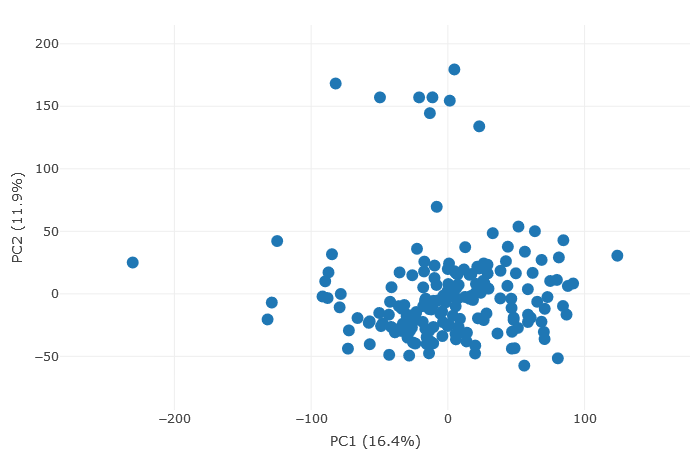

In [69]:
from IPython.display import Image
Image("pca_plot.png", width=700, height=800)

#### What does the analysis say about the general behaviour of the different samples?

#### Are the neuroendocrine tumors clearly separable from the adenocarcinoma tumors?-- Overlay the information from metadata column ‘histological_type_other’ on top of PCA plot and check if neuroendocrine tumors are separating out.

Ans: No, plotting the histological_type on PC1 and PC2 do not give clear explanation about the neuroendocrine tumors. But, after overlying the 'histological_type_other' on the PCA plot, it become clear, and we can see neuroendocrine tumors sepearting out, with a few exception. However, most of the adenocaarcinoma tumors takes place in the middle. Also, it is important to note that, we have less no. of sample for neuroendocrine tumors.

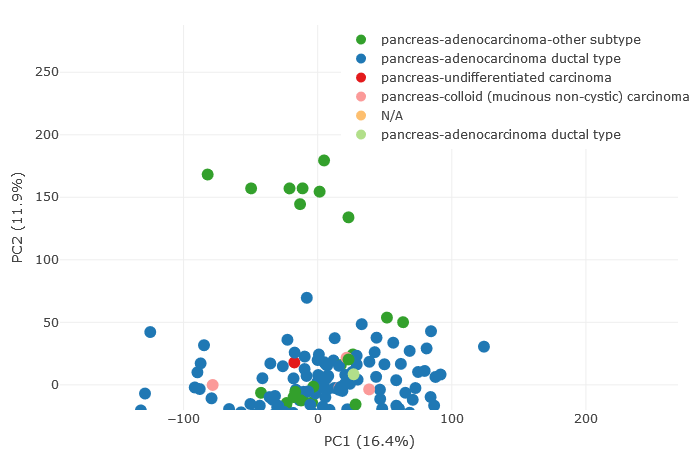

In [70]:
from IPython.display import Image
Image("histological_type_2.png", width=700, height=800)

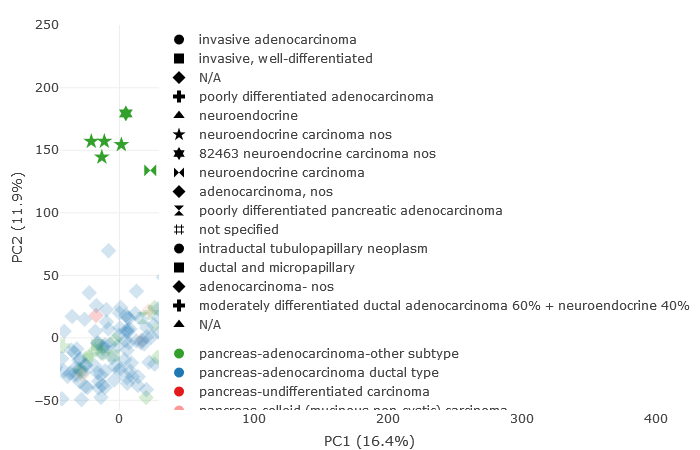

In [66]:
Image("neuroendocrine_tumors.png", width=700, height=800)

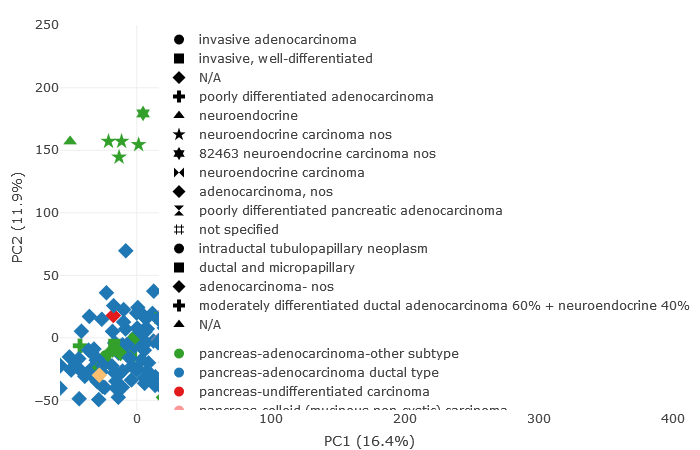

In [67]:
Image("neuroendocrine_tumors_2.png", width=700, height=800)

#### What can be said about the variance of the PCA?

##### Remove the neuroendocrine tumors from the dataset so that it contains only the adenocarcinoma tumor samples. The histology for the different tumor samples is contained in the GCT file.

Ans: By applying filter in Phantasus tool, we only select the adenocarcinoma tumor sample. Out of 183 samples, there are 175 smaples for adenocarcinoma tumor. 

This data will be used in the third part of the assignment. 